<a href="https://colab.research.google.com/github/jblstorm/Beom/blob/main/%EC%8A%A4%ED%8F%AC%EC%B8%A0%EA%B4%80%EC%A4%91%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install pytimekr
from pytimekr import pytimekr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pytimekr: filename=pytimekr-0.1.0-py3-none-any.whl size=7941 sha256=115d55ad5f1e07ed96830e30431156ea9c5fb21ad5e93f53c814c1f88343b09d
  Stored in directory: /root/.cache/pip/wheels/7c/54/31/d099bce210ce51c45eeb97e149699dedc66c78eb84c01be9c2
Successfully built pytimekr


In [2]:
KBL=pd.read_excel('/content/drive/MyDrive/문화데이터경진대회/스포츠관중전체입장 현황/프로농구_2018~2022_전체관중현황.xlsx')
KLEAGUE=pd.read_excel('/content/drive/MyDrive/문화데이터경진대회/스포츠관중전체입장 현황/K리그1_2018-2022_전체관중현황.xlsx')
MAN_KOVO=pd.read_excel('/content/drive/MyDrive/문화데이터경진대회/스포츠관중전체입장 현황/남자프로배구_2018~2022_전체관중현황.xlsx')
WOMAN_KOVO=pd.read_excel('/content/drive/MyDrive/문화데이터경진대회/스포츠관중전체입장 현황/여자프로배구_2018~2022_전체관중현황.xlsx')
KBO=pd.read_excel('/content/drive/MyDrive/문화데이터경진대회/스포츠관중전체입장 현황/프로야구_2018-2022_전체관중현황.xlsx')
WKBL=pd.read_excel('/content/drive/MyDrive/문화데이터경진대회/스포츠관중전체입장 현황/여자프로농구_2018-2022_전체관중현황.xlsx')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  


# 데이터 기본 파악 및 전처리

In [3]:
# 기본 형태 출력

print(KBL)
print(KLEAGUE)
print(MAN_KOVO)
print(WOMAN_KOVO)
print(KBO)
print(WKBL)

         SEASON       DATE DAY  HOME AWAY STADIUM WEATHER TEMPERATURE  \
0     2021-2022 2022-05-10   화    SK  KGC    잠실학생    구름많음       26.3℃   
1     2021-2022 2022-05-08   일   KGC   SK      안양       비         18℃   
2     2021-2022 2022-05-06   금   KGC   SK      안양    구름조금       24.9℃   
3     2021-2022 2022-05-04   수    SK  KGC    잠실학생      맑음       25.2℃   
4     2021-2022 2022-05-02   월    SK  KGC    잠실학생      맑음       19.4℃   
...         ...        ...  ..   ...  ...     ...     ...         ...   
1077  2018-2019 2018-10-14   일  전자랜드   SK  인천삼산월드     NaN         NaN   
1078  2018-2019 2018-10-14   일    DB   삼성    원주종합     NaN         NaN   
1079  2018-2019 2018-10-13   토    SK   DB    잠실학생     NaN         NaN   
1080  2018-2019 2018-10-13   토   KCC   LG      군산     NaN         NaN   
1081  2018-2019 2018-10-13   토   모비스   KT      울산     NaN         NaN   

      ATTENDANCE  attendance_capacity  
0           5308                 5400  
1           5200                 6690  
2  

In [4]:
#데이터프레임 열 타입 확인

KBO.info()
KLEAGUE.info()
KBL.info()
WKBL.info()
MAN_KOVO.info()
WOMAN_KOVO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3039 entries, 0 to 3038
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE                 3039 non-null   datetime64[ns]
 1   DAY                  3039 non-null   object        
 2   hometeam             3039 non-null   object        
 3   awayteam             3039 non-null   object        
 4   STADIUM              3039 non-null   object        
 5   WEATHER              3038 non-null   object        
 6   TEMPERATURE          3039 non-null   object        
 7   ATTENDANCE           3039 non-null   int64         
 8   attendance_capacity  3039 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 213.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               ---------

# 각 종목별 변수 추가와 전처리

In [5]:
from datetime import datetime, timedelta
from pandas import DataFrame

KBO['year'] = KBO['DATE'].dt.year
KBO['month'] = KBO['DATE'].dt.month
KBO['day'] = KBO['DATE'].dt.day
KBO['dayofweek'] = KBO['DATE'].dt.dayofweek
KBO.rename(columns={'HOME':'hometeam','AWAY':'awayteam'},inplace=True)
KBO['game'] = 1 ##경기수 지정, groupby 함수를 이용한 경기당 관중입장 측정, 분석 활용
KBO['is_weekend'] = ((KBO['DATE'].dt.dayofweek) // 5 == 1).astype(int) #몫이 1이면 주말, 0이면 평일
KBO[ 'occupancy' ] = KBO[ 'ATTENDANCE' ] / KBO[ 'attendance_capacity' ] #경기장별 관중점유율 변수 생성


KBO['TEMPERATURE'] = KBO['TEMPERATURE'].str.replace(pat=r'[℃]', repl= r' ',regex=True)  # replace multiple spaces with a single space(공란 없이)
KBO['TEMPERATURE'] = KBO['TEMPERATURE'].astype(float)



KBO.replace('넥센','키움',inplace=True)
KBO.replace('SK','SSG',inplace=True)

KBO.replace('서울 잠실','잠실', inplace=True)
KBO.replace('인천 문학','문학', inplace=True)
KBO.replace('서울 고척돔','고척', inplace=True)
KBO.replace('부산 사직','사직', inplace=True)

KBO.head()


,DATE,DAY,hometeam,awayteam,STADIUM,WEATHER,TEMPERATURE,ATTENDANCE,attendance_capacity,year,month,day,dayofweek,game,is_weekend,occupancy
0,2022-07-06,수,한화,NC,대전,흐림,35.4,2726,12000,2022,7,6,2,1,0,0.227167
1,2022-07-06,수,KIA,KT,광주,구름많음,34.5,6269,20500,2022,7,6,2,1,0,0.305805
2,2022-07-06,수,삼성,LG,대구,비,33.8,4673,24000,2022,7,6,2,1,0,0.194708
3,2022-07-06,수,SSG,롯데,문학,구름많음,33.2,6859,23000,2022,7,6,2,1,0,0.298217
4,2022-07-06,수,두산,키움,잠실,비,33.3,2930,25000,2022,7,6,2,1,0,0.117200


In [6]:
from pandas import DataFrame

KBL['year'] = KBL['DATE'].dt.year
KBL['month'] = KBL['DATE'].dt.month
KBL['day'] = KBL['DATE'].dt.day
KBL['dayofweek'] = KBL['DATE'].dt.dayofweek
KBL['game'] = 1 
KBL['is_weekend'] = ((KBL['DATE'].dt.dayofweek) // 5 == 1).astype(int)#몫이 1이면 주말, 0이면 평일

KBL['TEMPERATURE'] = KBL['TEMPERATURE'].str.replace(pat=r'[℃]', repl= r' ',regex=True)
KBL['TEMPERATURE'] = KBL['TEMPERATURE'].astype(float)
KBL[ 'occupancy' ] = KBL[ 'ATTENDANCE' ] / KBL[ 'attendance_capacity' ] #경기장별 관중점유율 변수 생성



KBL.rename(columns={'HOME':'hometeam','AWAY':'awayteam'},inplace=True)
KBL.head()

,SEASON,DATE,DAY,hometeam,awayteam,STADIUM,WEATHER,TEMPERATURE,ATTENDANCE,attendance_capacity,year,month,day,dayofweek,game,is_weekend,occupancy
0,2021-2022,2022-05-10,화,SK,KGC,잠실학생,구름많음,26.3,5308,5400,2022,5,10,1,1,0,0.982963
1,2021-2022,2022-05-08,일,KGC,SK,안양,비,18.0,5200,6690,2022,5,8,6,1,1,0.777280
2,2021-2022,2022-05-06,금,KGC,SK,안양,구름조금,24.9,4445,6690,2022,5,6,4,1,0,0.664425
3,2021-2022,2022-05-04,수,SK,KGC,잠실학생,맑음,25.2,5303,5400,2022,5,4,2,1,0,0.982037
4,2021-2022,2022-05-02,월,SK,KGC,잠실학생,맑음,19.4,5311,5400,2022,5,2,0,1,0,0.983519


In [7]:
from datetime import datetime, timedelta
from pandas import DataFrame

KLEAGUE['year'] = KLEAGUE['DATE'].dt.year
KLEAGUE['month'] = KLEAGUE['DATE'].dt.month
KLEAGUE['day'] = KLEAGUE['DATE'].dt.day
KLEAGUE['dayofweek'] = KLEAGUE['DATE'].dt.dayofweek
KLEAGUE['is_weekend'] = ((KLEAGUE['DATE'].dt.dayofweek) // 5 == 1).astype(int) #몫이 1이면 주말, 0이면 평일 #몫이 1이면 주말, 0이면 평일
KLEAGUE['game'] = 1
KLEAGUE['ATTENDANCE'].astype(int) #정수형 변환
KLEAGUE[ 'occupancy' ] = KLEAGUE[ 'ATTENDANCE' ] /KLEAGUE[ 'attendance_capacity' ]
KLEAGUE['TEMPERATURE'] = KLEAGUE['TEMPERATURE'].str.replace(pat=r'[℃]', repl= r' ',regex=True)  # replace multiple spaces with a single space(공란 없이)
KLEAGUE['TEMPERATURE'] = pd.to_numeric(KLEAGUE['TEMPERATURE'], errors='coerce', downcast='float')


KLEAGUE.rename(columns={'HOME':'hometeam','AWAY':'awayteam'},inplace=True)
KLEAGUE.replace('수원 삼성','수원',inplace=True)
KLEAGUE.replace('수원 FC','수원F',inplace=True)
KLEAGUE.replace('상주 상무','상주',inplace=True)
KLEAGUE.replace('김천상무','김천',inplace=True)
KLEAGUE.replace('FC 서울','서울',inplace=True)
KLEAGUE.replace('인천 Utd','인천',inplace=True)
KLEAGUE.replace('전북 현대','전북',inplace=True)
KLEAGUE.replace('성남 FC','성남',inplace=True)
KLEAGUE.replace('포항 스틸러스','포항',inplace=True)
KLEAGUE.replace('전남 드래곤즈','전남',inplace=True)
KLEAGUE.replace('대구 FC','대구',inplace=True)
KLEAGUE.replace('강원 FC','강원',inplace=True)
KLEAGUE.replace('경남 FC','경남',inplace=True)
KLEAGUE.replace('울산 현대','울산',inplace=True)
KLEAGUE.replace('제주 Utd','제주',inplace=True)
KLEAGUE.replace('광주 FC','광주',inplace=True)
KLEAGUE.replace('부산 아이파크','부산',inplace=True)
KLEAGUE.replace('대전 하나 시티즌','대전',inplace=True)
KLEAGUE.head()

,DATE,DAY,hometeam,awayteam,STADIUM,WEATHER,TEMPERATURE,ATTENDANCE,attendance_capacity,year,month,day,dayofweek,is_weekend,game,occupancy
0,2018-03-01,목,제주,서울,제주W,맑음,7.3,4979,29790,2018,3,1,3,0,1,0.167137
1,2018-03-01,목,수원,전남,수원W,맑음,-3.6,8456,43923,2018,3,1,3,0,1,0.192519
2,2018-03-01,목,전북,울산,전주W,맑음,3.0,17188,36780,2018,3,1,3,0,1,0.467319
3,2018-03-03,토,강원,인천,춘천,맑음,11.6,4530,20000,2018,3,3,5,1,1,0.226500
4,2018-03-03,토,포항,대구,포항스틸야드,맑음,9.9,14584,15170,2018,3,3,5,1,1,0.961371


In [8]:
from datetime import datetime, timedelta
from pandas import DataFrame
MAN_KOVO['DATE'] = pd.to_datetime(MAN_KOVO['DATE'])
MAN_KOVO['year'] = MAN_KOVO['DATE'].dt.year
MAN_KOVO['month'] = MAN_KOVO['DATE'].dt.month
MAN_KOVO['day'] = MAN_KOVO['DATE'].dt.day
MAN_KOVO['dayofweek'] = MAN_KOVO['DATE'].dt.dayofweek
MAN_KOVO.rename(columns={'HOME':'hometeam','AWAY':'awayteam'},inplace=True)
MAN_KOVO['is_weekend'] = ((MAN_KOVO['DATE'].dt.dayofweek) // 5 == 1).astype(int) #몫이 1이면 주말, 0이면 평일
MAN_KOVO['TEMPERATURE']=MAN_KOVO['TEMPERATURE'].str.replace(pat=r'[℃]', repl= r' ',regex=True)  # replace multiple spaces with a single space(공란 없이)
MAN_KOVO['TEMPERATURE'] =MAN_KOVO['TEMPERATURE'].astype(float)
MAN_KOVO['WEATHER'].fillna('맑음')

MAN_KOVO['game'] = 1 
MAN_KOVO[ 'occupancy' ] = MAN_KOVO[ 'ATTENDANCE' ] / MAN_KOVO[ 'attendance_capacity' ] #경기장별 관중점유율 변수 생성

MAN_KOVO.head()

,SEASON,DATE,DAY,hometeam,awayteam,STADIUM,WEATHER,TEMPERATURE,ATTENDANCE,attendance_capacity,year,month,day,dayofweek,is_weekend,game,occupancy
0,2021-2022,2022-03-30,수,KB손해보험,한국전력,의정부,NaN,NaN,599,6240,2022,3,30,2,0,1,0.095994
1,2021-2022,2022-03-29,화,대한항공,삼성화재,인천계양,NaN,NaN,605,4270,2022,3,29,1,0,1,0.141686
2,2021-2022,2022-03-28,월,OK금융그룹,현대캐피탈,안산상록수,NaN,NaN,474,2700,2022,3,28,0,0,1,0.175556
3,2021-2022,2022-03-27,일,한국전력,우리카드,수원,NaN,NaN,1011,4317,2022,3,27,6,1,1,0.234190
4,2021-2022,2022-03-26,토,KB손해보험,삼성화재,의정부,NaN,NaN,1015,6240,2022,3,26,5,1,1,0.162660


In [9]:
from pandas import DataFrame
WOMAN_KOVO['DATE'] = pd.to_datetime(WOMAN_KOVO['DATE'])
WOMAN_KOVO['year'] = WOMAN_KOVO['DATE'].dt.year
WOMAN_KOVO['month'] = WOMAN_KOVO['DATE'].dt.month
WOMAN_KOVO['day'] =WOMAN_KOVO['DATE'].dt.day
WOMAN_KOVO['dayofweek'] = WOMAN_KOVO['DATE'].dt.dayofweek
WOMAN_KOVO['is_weekend'] = ((WOMAN_KOVO['DATE'].dt.dayofweek) // 5 == 1).astype(int) #몫이 1이면 주말, 0이면 평일
WOMAN_KOVO['TEMPERATURE'].fillna('15')
WOMAN_KOVO['TEMPERATURE'] = WOMAN_KOVO['TEMPERATURE'].str.replace(pat=r'[℃]', repl= r' ',regex=True)

WOMAN_KOVO['TEMPERATURE'] = WOMAN_KOVO['TEMPERATURE'].astype(float)
WOMAN_KOVO['WEATHER'].fillna('맑음')
WOMAN_KOVO['game'] = 1 
WOMAN_KOVO['occupancy']= WOMAN_KOVO['ATTENDANCE']/WOMAN_KOVO["attendance_capacity"]



WOMAN_KOVO.rename(columns={'HOME':'hometeam','AWAY':'awayteam'},inplace=True)
WOMAN_KOVO.head()

,SEASON,DATE,DAY,hometeam,awayteam,STADIUM,WEATHER,TEMPERATURE,ATTENDANCE,attendance_capacity,year,month,day,dayofweek,is_weekend,game,occupancy
0,2021~2022,2022-03-21,월,흥국생명,GS칼텍스,인천삼산월드,구름많음,8.3,489,7140,2022,3,21,0,0,1,0.068487
1,2021~2022,2022-03-20,일,IBK기업은행,KGC인삼공사,화성,구름많음,8.6,1576,5158,2022,3,20,6,1,1,0.305545
2,2021~2022,2022-03-05,토,한국도로공사,흥국생명,김천,맑음,10.3,805,8000,2022,3,5,5,1,1,0.100625
3,2021~2022,2022-03-03,목,KGC인삼공사,페퍼저축은행,대전충무,맑음,14.6,437,6000,2022,3,3,3,0,1,0.072833
4,2021~2022,2022-03-02,수,흥국생명,IBK기업은행,인천계양,맑음,6.4,784,7140,2022,3,2,2,0,1,0.109804


In [10]:
WKBL['DATE'] = pd.to_datetime(WKBL['DATE'])
WKBL['year'] = WKBL['DATE'].dt.year
WKBL['month'] = WKBL['DATE'].dt.month
WKBL['day'] =WKBL['DATE'].dt.day
WKBL['dayofweek'] = WKBL['DATE'].dt.dayofweek
WKBL['is_weekend'] = ((WKBL['DATE'].dt.dayofweek) // 5 == 1).astype(int)
 #몫이 1이면 주말, 0이면 평일

WKBL['TEMPERATURE'] = WKBL['TEMPERATURE'].str.replace(pat=r'[℃]', repl= r' ',regex=True) 
WKBL['TEMPERATURE'] = WKBL['TEMPERATURE'].astype(float)
WKBL['WEATHER'].fillna('맑음')

WKBL['game'] = 1 

WKBL.rename(columns={'HOME':'hometeam','AWAY':'awayteam'},inplace=True)
WKBL.head()


,SEASON,DATE,DAY,hometeam,awayteam,STADIUM,WEATHER,TEMPERATURE,ATTENDANCE,year,month,day,dayofweek,is_weekend,game
0,2021-2022,2022-04-14,목,우리은행,KB스타즈,아산이순신체육관,NaN,NaN,1383,2022,4,14,3,0,1
1,2021-2022,2022-04-12,화,KB스타즈,우리은행,청주체육관,NaN,NaN,1610,2022,4,12,1,0,1
2,2021-2022,2022-04-12,일,KB스타즈,우리은행,청주체육관,NaN,NaN,2145,2022,4,12,1,0,1
3,2021-2022,2022-04-10,목,신한은행,우리은행,인천도원체육관,NaN,NaN,557,2022,4,10,6,1,1
4,2021-2022,2022-04-07,화,우리은행,신한은행,아산이순신체육관,구름많음,17.8,760,2022,4,7,3,0,1


원본데이터에서는 연,월,일로 분류된 것을 전체적으로 날짜별로 통합
변수 중 주말, 평일 구분과 게임수, 경기장별 수용인원 변수를 추가
수용인원과 일별 관중 수를 나눈 파생변수로 일일별 점유율 생성

데이터 전체적으로 날씨데이터에서 결측치가 다수 발견되어 기상청 기상자료개방포털에서 평균기온 및 구름 상태를 수집

In [11]:
# 결측치 확인 및 제거
KLEAGUE.isnull()
KLEAGUE['TEMPERATURE'].dropna()
KLEAGUE['ATTENDANCE'] = KLEAGUE['ATTENDANCE'].replace(0, np.NaN)
KLEAGUE.dropna(inplace=True) 

In [12]:
WKBL.dropna()
WKBL['WEATHER'].fillna('맑음')

0        맑음
1        맑음
2        맑음
3        맑음
4      구름많음
       ... 
369       비
370       비
371    구름조금
372      맑음
373      맑음
Name: WEATHER, Length: 374, dtype: object

In [13]:
KBO['DAY'].unique
KBO['DAY'].count
KBO['ATTENDANCE'] = KBO['ATTENDANCE'].replace(0, np.NaN)
KBO.dropna(inplace=True) 

In [14]:
category_feature = [ col for col in KBO.columns if KBO[col].dtypes == "object"]
category_feature
KBO['TEMPERATURE'].interpolate(method='linear',limit_direction='forward')
KBO['WEATHER'].fillna("맑음")

0         흐림
1       구름많음
2          비
3       구름많음
4          비
        ... 
3034      맑음
3035    구름많음
3036      흐림
3037    구름조금
3038    구름많음
Name: WEATHER, Length: 2414, dtype: object

In [15]:
KBL.dropna()

,SEASON,DATE,DAY,hometeam,awayteam,STADIUM,WEATHER,TEMPERATURE,ATTENDANCE,attendance_capacity,year,month,day,dayofweek,game,is_weekend,occupancy
0,2021-2022,2022-05-10,화,SK,KGC,잠실학생,구름많음,26.3,5308,5400,2022,5,10,1,1,0,0.982963
1,2021-2022,2022-05-08,일,KGC,SK,안양,비,18.0,5200,6690,2022,5,8,6,1,1,0.777280
2,2021-2022,2022-05-06,금,KGC,SK,안양,구름조금,24.9,4445,6690,2022,5,6,4,1,0,0.664425
3,2021-2022,2022-05-04,수,SK,KGC,잠실학생,맑음,25.2,5303,5400,2022,5,4,2,1,0,0.982037
4,2021-2022,2022-05-02,월,SK,KGC,잠실학생,맑음,19.4,5311,5400,2022,5,2,0,1,0,0.983519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,2020-2021,2020-10-10,토,전자랜드,SK,인천삼산월드,구름조금,20.0,0,7140,2020,10,10,5,1,1,0.000000
574,2020-2021,2020-10-10,토,삼성,KGC,잠실실내,구름조금,21.5,0,5049,2020,10,10,5,1,1,0.000000
575,2020-2021,2020-10-09,금,KGC,전자랜드,안양,맑음,23.5,0,6690,2020,10,9,4,1,0,0.000000
576,2020-2021,2020-10-09,금,DB,삼성,원주종합,구름조금,20.9,0,4600,2020,10,9,4,1,0,0.000000


In [16]:
KLEAGUE['TEMPERATURE'].fillna(0)
KLEAGUE['TEMPERATURE'].replace('4.0℃',4.0)
pd.to_numeric(KLEAGUE['TEMPERATURE'], errors='ignore')

0       7.300000
1      -3.600000
2       3.000000
3      11.600000
4       9.900000
         ...    
966    32.900002
967    30.000000
968    34.500000
969    33.299999
970    33.200001
Name: TEMPERATURE, Length: 804, dtype: float32

In [17]:
KLEAGUE['WEATHER'].unique()

array(['맑음', '흐림', '비', '구름많음', '구름조금', '눈'], dtype=object)

In [18]:
KLEAGUE['hometeam'].duplicated()
KLEAGUE['hometeam'].drop_duplicates()

0       제주
1       수원
2       전북
3       강원
4       포항
5       경남
6       울산
8       대구
9       인천
10      서울
11      전남
65      상주
227     부산
238     성남
553     광주
636    수원F
849     대전
862     김천
Name: hometeam, dtype: object

In [19]:
WOMAN_KOVO['STADIUM'].unique()

KBO.replace('서울 잠실','잠실', inplace=True)
KBO.replace('인천 문학','문학', inplace=True)
KBO.replace('서울 고척돔','고척', inplace=True)
KBO.replace('부산 사직','사직', inplace=True)

In [20]:
#연도별 관중 합계
#프로축구 연도별 관중
KLEAGUE.groupby('dayofweek')['ATTENDANCE'].sum()

dayofweek
0       5161.0
1     119123.0
2     398385.0
3      85003.0
4     148857.0
5    1604513.0
6    1800188.0
Name: ATTENDANCE, dtype: float64

In [21]:

#프로야구 연도별 관중
KBO.groupby('dayofweek')['ATTENDANCE'].sum()

dayofweek
0      73894.0
1    2529928.0
2    2564379.0
3    2460074.0
4    3016394.0
5    5111104.0
6    3910091.0
Name: ATTENDANCE, dtype: float64

In [22]:
#프로농구 시즌별 관중
KBL.groupby('dayofweek')['ATTENDANCE'].sum()

dayofweek
0     85482
1    190692
2    208829
3    159590
4    210544
5    521286
6    581940
Name: ATTENDANCE, dtype: int64

In [23]:
#여자프로농구 시즌별 관중
WKBL.groupby('dayofweek')['ATTENDANCE'].sum()

dayofweek
0    42281
1     5572
2    32138
3    38052
4    30837
5    40894
6    48217
Name: ATTENDANCE, dtype: int64

In [24]:
#남자프로배구 시즌별 관중
MAN_KOVO.groupby('dayofweek')['ATTENDANCE'].sum()

dayofweek
0     48081
1     79172
2     51984
3     89343
4     85841
5    122068
6    132080
Name: ATTENDANCE, dtype: int64

In [25]:
#여자프로배구 시즌별 관중
WOMAN_KOVO.groupby('dayofweek')['ATTENDANCE'].sum()

dayofweek
0     21887
1     62178
2    115756
3     56511
4     27510
5    120932
6    133502
Name: ATTENDANCE, dtype: int64

# 종목 전체 시즌별 총관중 및 경기장, 요일별 총관중 집계

In [26]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,228 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


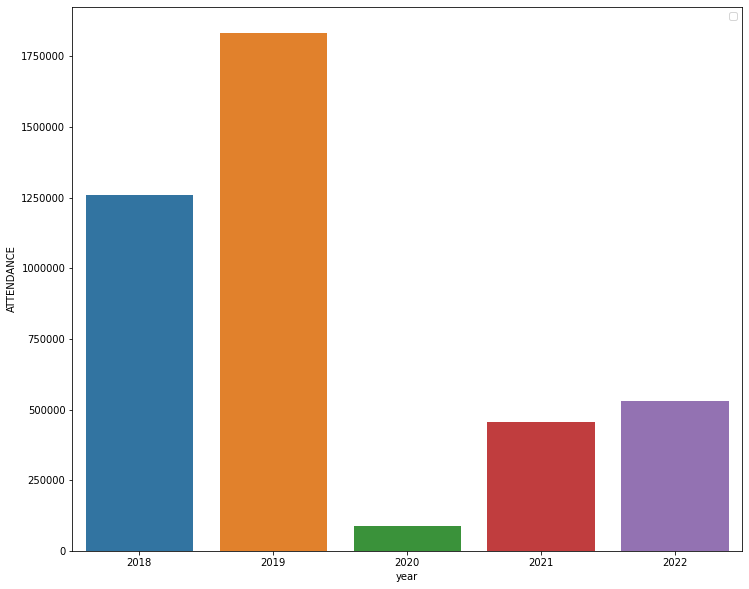

In [27]:
# 연도별 관중수 시각화

plt.rc('font', family='NanumBarunGothic') 


plt.figure(figsize=(12,10))
plt.legend(labels=KLEAGUE['year'])

x = KLEAGUE.groupby('year')['ATTENDANCE'].sum().keys()
y = KLEAGUE.groupby('year')['ATTENDANCE'].sum()
plt.ticklabel_format(style='plain')
sns.barplot(x, y)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


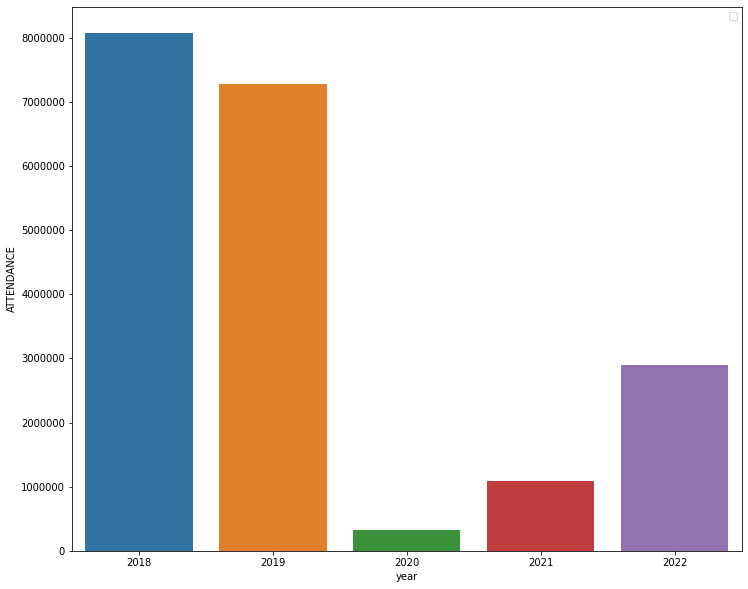

In [28]:
plt.rc('font', family='NanumBarunGothic') 

plt.figure(figsize=(12, 10))

x = KBO.groupby('year')['ATTENDANCE'].sum().keys()
y = KBO.groupby('year')['ATTENDANCE'].sum()
plt.ticklabel_format(style='plain')
plt.legend(labels='year')
sns.barplot(x, y)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


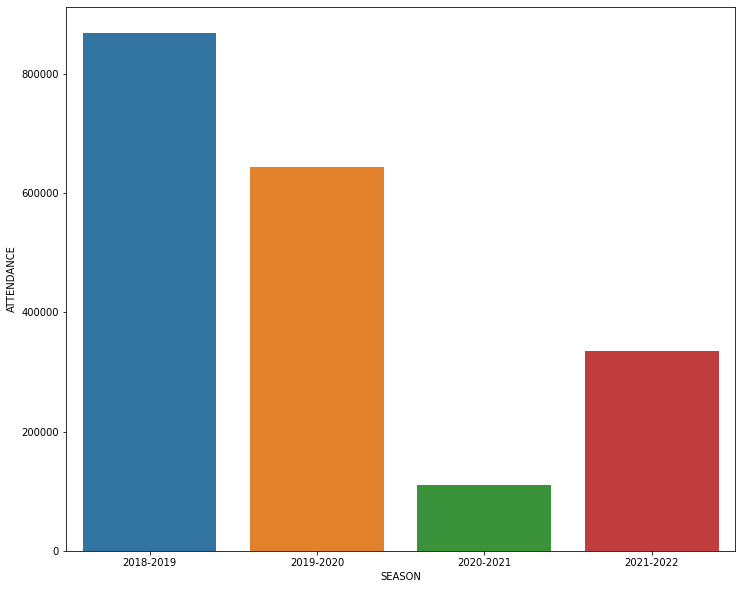

In [29]:
plt.rc('font', family='NanumBarunGothic') 

plt.figure(figsize=(12, 10))

x = KBL.groupby('SEASON')['ATTENDANCE'].sum().keys()
y = KBL.groupby('SEASON')['ATTENDANCE'].sum()
plt.ticklabel_format(style='plain')
sns.barplot(x, y)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


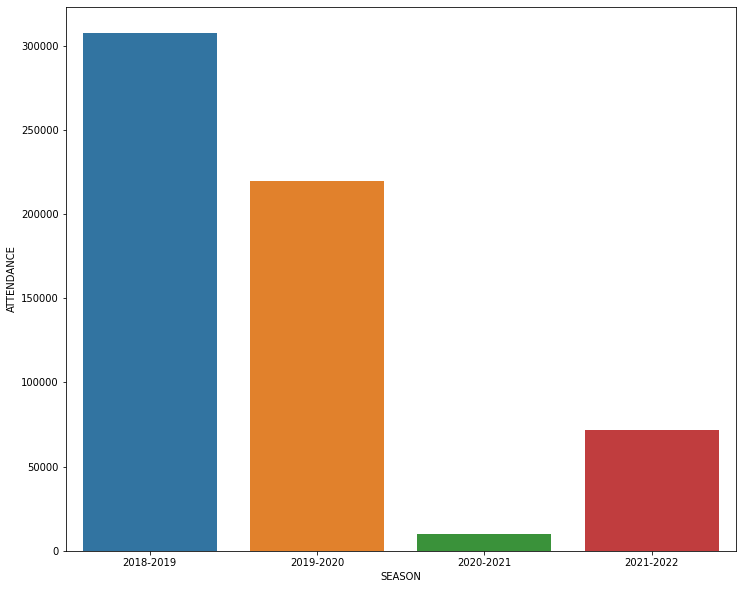

In [30]:
plt.rc('font', family='NanumBarunGothic') 


plt.figure(figsize=(12, 10))

x = MAN_KOVO.groupby('SEASON')['ATTENDANCE'].sum().keys()
y = MAN_KOVO.groupby('SEASON')['ATTENDANCE'].sum()
plt.ticklabel_format(style='plain')
sns.barplot(x, y)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


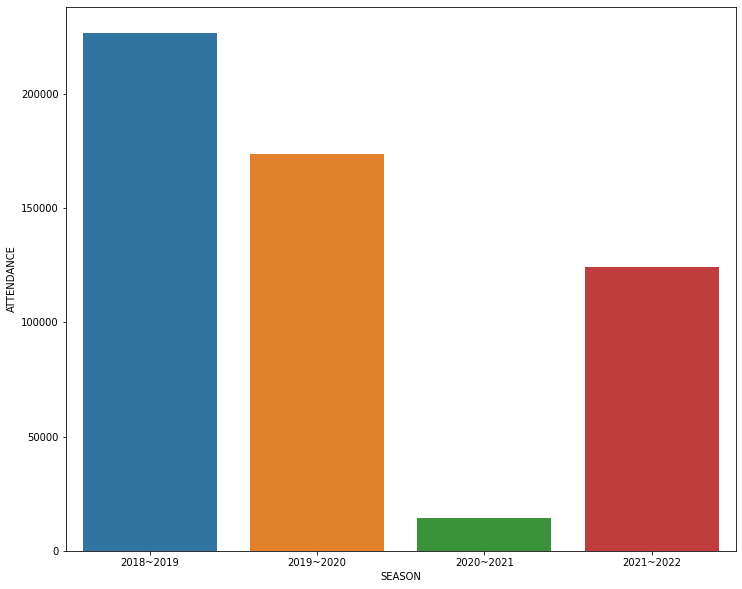

In [31]:
plt.rc('font', family='NanumBarunGothic') 
plt.figure(figsize=(12, 10))

x = WOMAN_KOVO.groupby('SEASON')['ATTENDANCE'].sum().keys()
y = WOMAN_KOVO.groupby('SEASON')['ATTENDANCE'].sum()
plt.ticklabel_format(style='plain')
sns.barplot(x, y)
sns.set(font_scale=2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


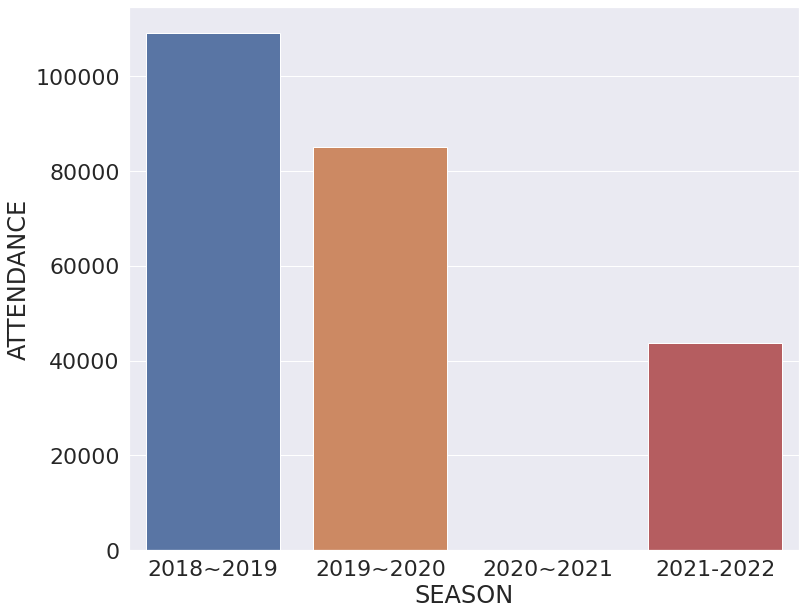

In [32]:
plt.rc('font', family='NanumBarunGothic') 
plt.figure(figsize=(12, 10))

x = WKBL.groupby('SEASON')['ATTENDANCE'].sum().keys()
y = WKBL.groupby('SEASON')['ATTENDANCE'].sum()
sns.set(font_scale=2)
plt.ticklabel_format(style='plain')
sns.barplot(x, y)

[Text(0, 0.5, '관중수'), Text(0.5, 0, '시즌')]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text

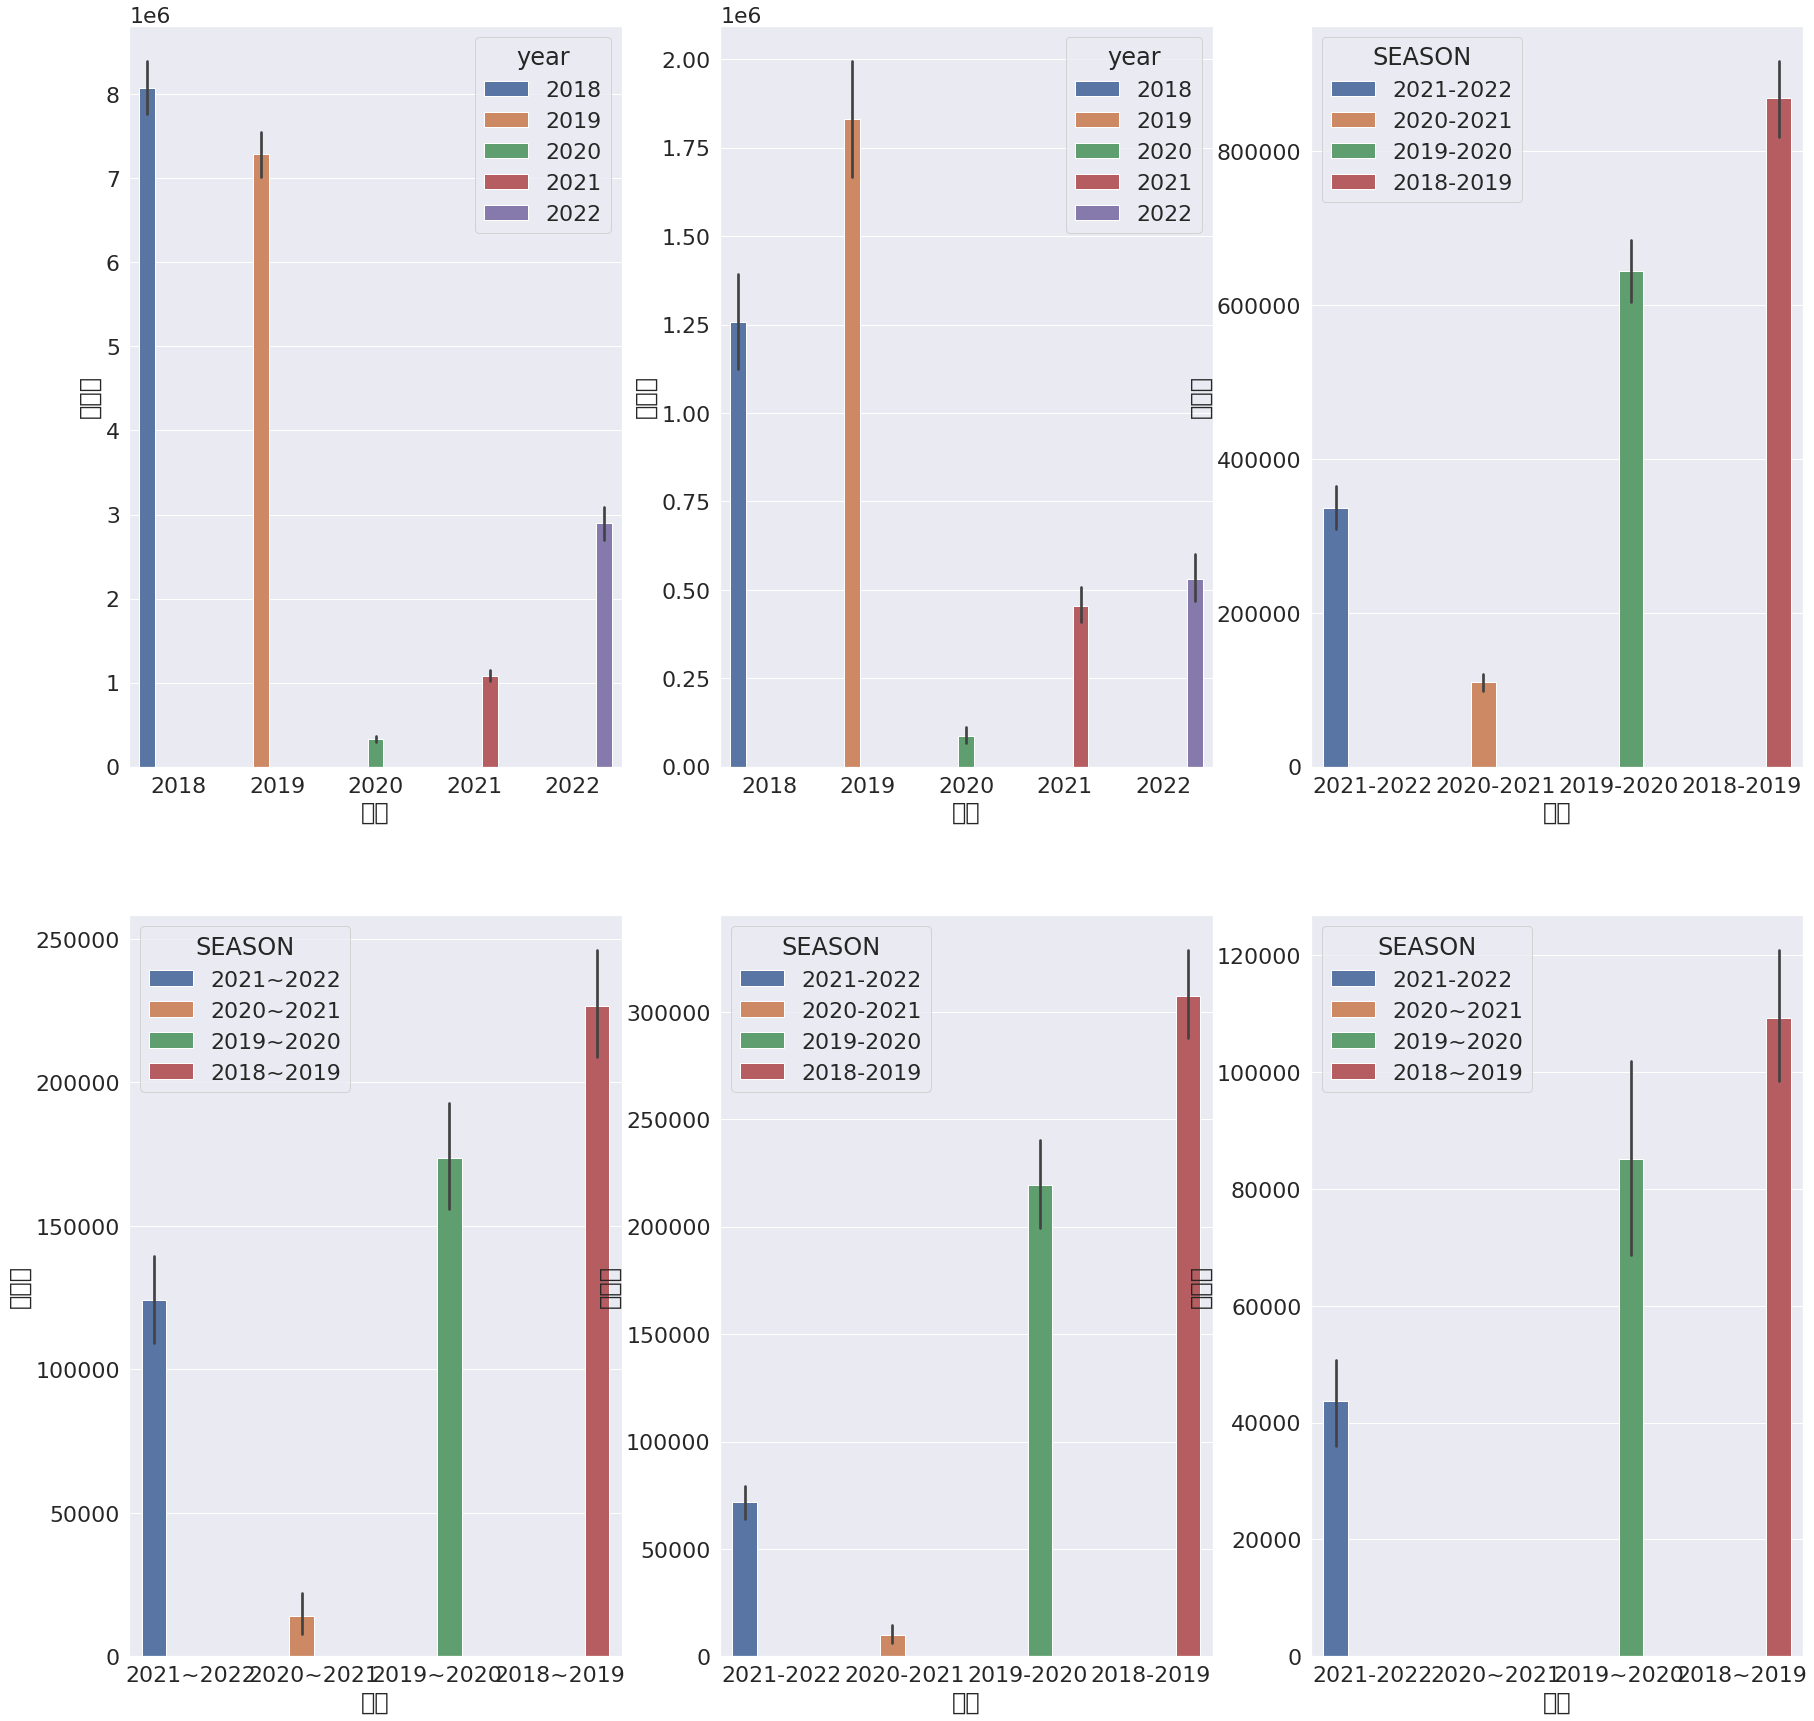

In [33]:
#2018~2022.7월 종목별 전체관중 현황 EDA
plt.rc('font', family='NanumBarunGothic') 
figure, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(30,30)

sns.barplot(data=KBO, x="year", y="ATTENDANCE", estimator=sum, ax=ax1,hue='year')
sns.barplot(data=KLEAGUE, x="year", y="ATTENDANCE", estimator=sum, ax=ax2,hue='year')
sns.barplot(data=KBL, x="SEASON", y="ATTENDANCE", estimator=sum, ax=ax3,hue='SEASON')
sns.barplot(data=WOMAN_KOVO, x="SEASON", y="ATTENDANCE",estimator=sum,ax=ax4,hue='SEASON')
sns.barplot(data=MAN_KOVO, x="SEASON", y="ATTENDANCE",estimator=sum,ax=ax5,hue='SEASON')
sns.barplot(data=WKBL, x="SEASON", y="ATTENDANCE",estimator=sum,ax=ax6,hue='SEASON')

plt.xticks()

ax1.set(xlabel='연도',ylabel='관중수')
ax2.set(xlabel='연도',ylabel='관중수')
ax3.set(xlabel='시즌',ylabel='관중수')
ax4.set(xlabel='시즌',ylabel='관중수')
ax5.set(xlabel='시즌',ylabel='관중수')
ax6.set(xlabel='시즌',ylabel='관중수')

**2018~2022년의 종목별 총관중수를 바 타입 차트로 시각화한 결과**


*   프로야구는 2018년 800만대를 돌파한 후, 지속적으로 감소 추세
*   프로축구(K리그) 역시 2019년 180만명을 돌파한 후 코로나 19 이슈와 맞물려, 관중입장 제한으로 인한 감소 추세


*   프로농구는 2018-2019 시즌 80만명대 관중 동원을 보여준 후, 2019-2020 시즌 코로나 19로 인한 조기종료와 인원제한이 맞물려 10만명대 미만으로 하락


*   여자농구는 2020-2021년 정규시즌 전경기 무관중 진행으로 해당 시즌 관중수 0을 기록
*   프로배구 남자부, 여자부 관중의 경우, 2021-22 시즌 종료 시점에서 여자부 전체관중이 남자부 전체관중을 추월








/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52377 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44305 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=fl

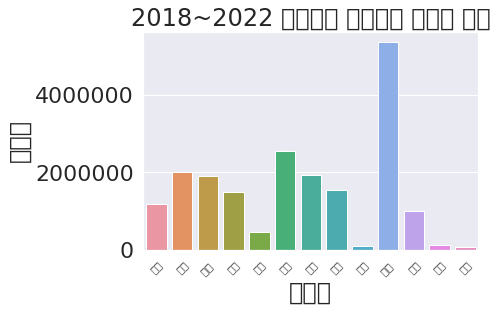

In [34]:
### 경기장별 관중 입장 합계 확인

plt.rc('font', family='NanumBarunGothic') 
x = KBO.groupby('STADIUM')['ATTENDANCE'].sum().keys()
y = KBO.groupby('STADIUM')['ATTENDANCE'].sum()
plt.title('2018~2022 프로야구 경기장별 관중수 합계')
plt.xticks(rotation=45,fontsize=10)

plt.ticklabel_format(style='plain')
sns.barplot(x, y)
plt.xlabel('경기장')
plt.ylabel('관중수')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47497 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44305 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=fl

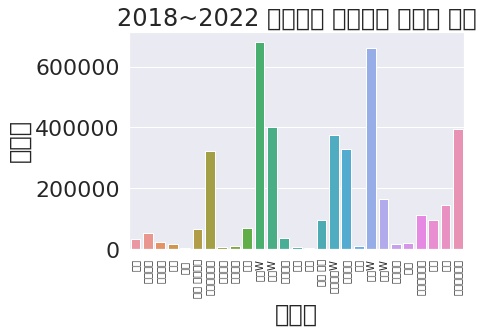

In [35]:
x = KLEAGUE.groupby('STADIUM')['ATTENDANCE'].sum().keys()
y = KLEAGUE.groupby('STADIUM')['ATTENDANCE'].sum()
plt.title('2018~2022 프로축구 경기장별 관중수 합계')
plt.ticklabel_format(style='plain')
plt.xticks(rotation=90,fontsize=10)
sns.barplot(x, y)
plt.xlabel('경기장')
plt.ylabel('관중수')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44400 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=fl

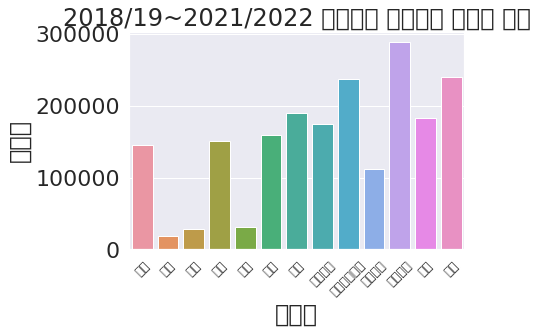

In [36]:
x = KBL.groupby('STADIUM')['ATTENDANCE'].sum().keys()
y = KBL.groupby('STADIUM')['ATTENDANCE'].sum()
plt.title('2018/19~2021/2022 프로농구 경기장별 관중수 합계')
plt.xticks(rotation=45,fontsize=12)
plt.ticklabel_format(style='plain')
sns.barplot(x, y)
plt.xlabel('경기장')
plt.ylabel('관중수')
plt.show()

## 대구의 경우 2021-22시즌부터 집계

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44608 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=fl

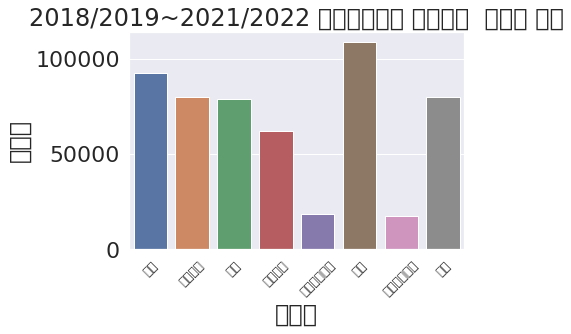

In [37]:
x = WOMAN_KOVO.groupby('STADIUM')['ATTENDANCE'].sum().keys()
y = WOMAN_KOVO.groupby('STADIUM')['ATTENDANCE'].sum()
plt.title('2018/2019~2021/2022 여자프로배구 경기장별  관중수 합계')
plt.xticks(rotation=45,fontsize=12)
plt.ticklabel_format(style='plain')
sns.barplot(x, y)
plt.xlabel('경기장')
plt.ylabel('관중수')
plt.show()

#광주의 경우 2021,2022년 집계

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52649 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=fl

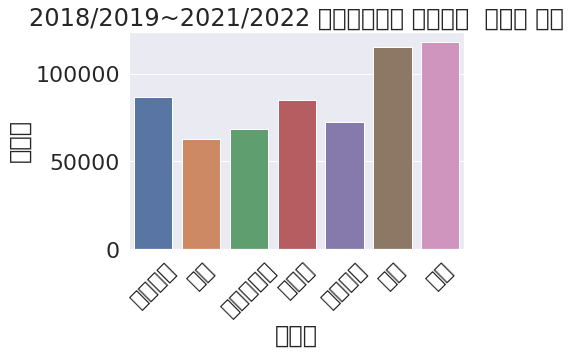

In [38]:
x = MAN_KOVO.groupby('STADIUM')['ATTENDANCE'].sum().keys()
y = MAN_KOVO.groupby('STADIUM')['ATTENDANCE'].sum()
plt.title('2018/2019~2021/2022 남자프로배구 경기장별  관중수 합계')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain')
sns.barplot(x, y)
plt.xlabel('경기장')
plt.ylabel('관중수')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49468 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=fl

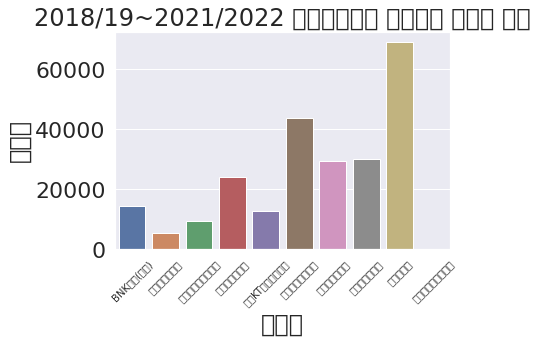

In [39]:

x = WKBL.groupby('STADIUM')['ATTENDANCE'].sum().keys()
y = WKBL.groupby('STADIUM')['ATTENDANCE'].sum()
plt.title('2018/19~2021/2022 여자프로농구 경기장별 관중수 합계')
plt.xticks(rotation=45,fontsize=10)
plt.ticklabel_format(style='plain')
sns.barplot(x, y)
plt.xlabel('경기장')
plt.ylabel('관중수')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=fl

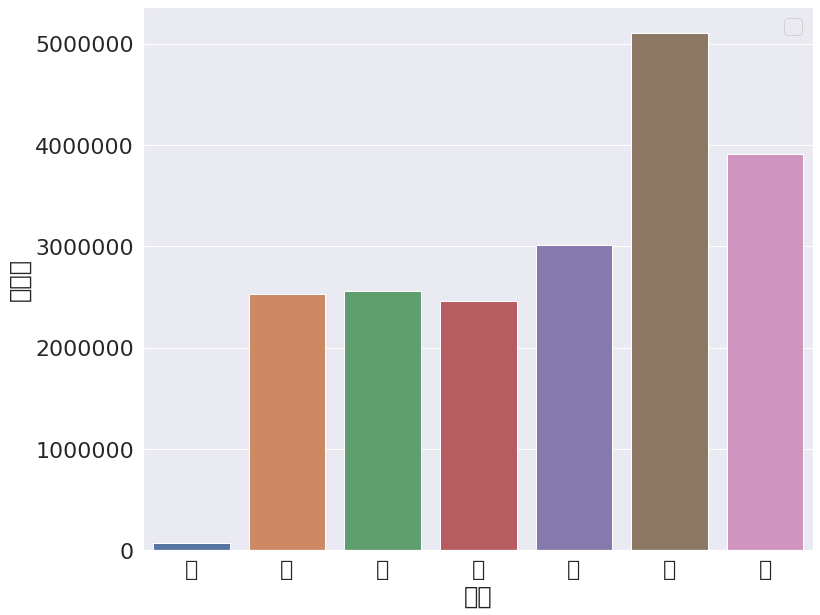

In [40]:
x = KBO.groupby('dayofweek')['ATTENDANCE'].sum().keys()
y = KBO.groupby('dayofweek')['ATTENDANCE'].sum()
plt.figure(figsize=(12, 10))
plt.legend(labels='day')
xlabel = ['월', '화', '수', '목', '금', '토', '일']




plt.ticklabel_format(style='plain')
ax = sns.barplot(x, y)
ax.set(xticklabels=xlabel)

plt.xlabel('요일')
plt.ylabel('관중수')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=fl

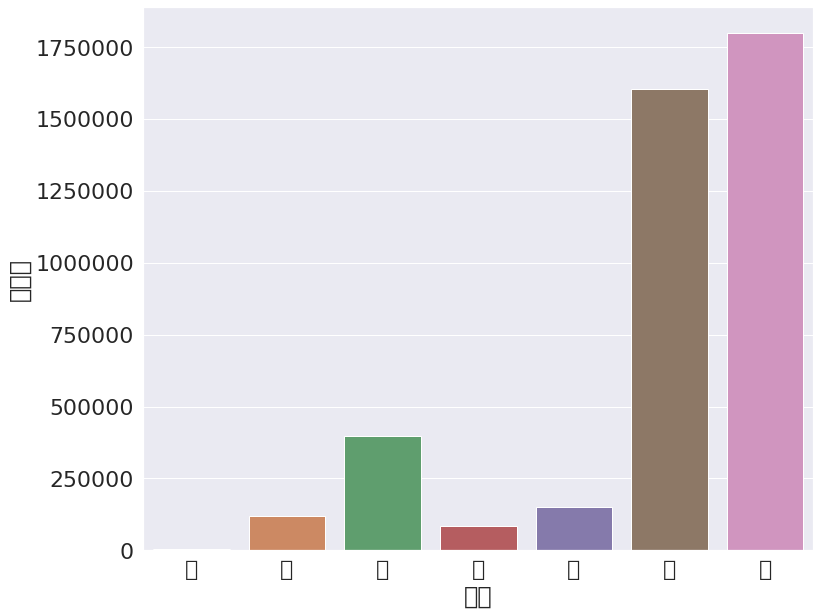

In [41]:
xlabel = ['월', '화', '수', '목', '금', '토', '일']
plt.figure(figsize=(12, 10))
x = KLEAGUE.groupby('dayofweek')['ATTENDANCE'].sum().keys()
y = KLEAGUE.groupby('dayofweek')['ATTENDANCE'].sum()



plt.ticklabel_format(style='plain')
ax = sns.barplot(x, y)
ax.set(xticklabels=xlabel)


plt.xlabel('요일')
plt.ylabel('관중수')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=fl

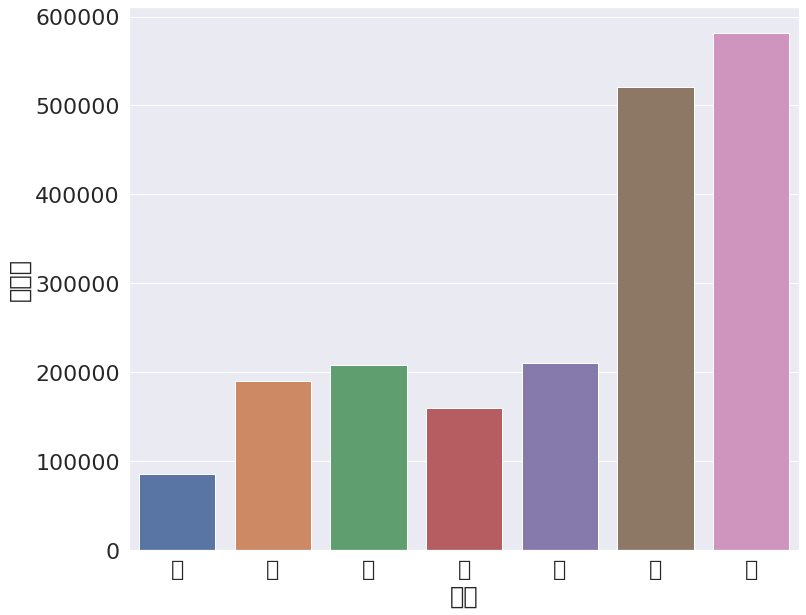

In [42]:
xlabel = ['월', '화', '수', '목', '금', '토', '일']
plt.figure(figsize=(12, 10))

x = KBL.groupby('dayofweek')['ATTENDANCE'].sum().keys()
y = KBL.groupby('dayofweek')['ATTENDANCE'].sum()


plt.ticklabel_format(style='plain')
ax=sns.barplot(x, y)
ax.set(xticklabels=xlabel)

plt.xlabel('요일')
plt.ylabel('관중수')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=fl

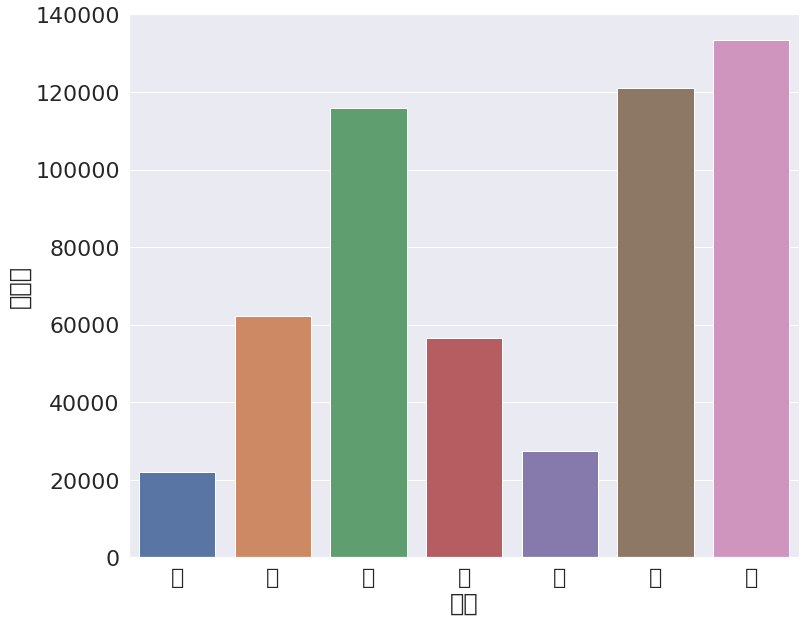

In [43]:
xlabel = ['월', '화', '수', '목', '금', '토', '일']
plt.figure(figsize=(12, 10))
x = WOMAN_KOVO.groupby('dayofweek')['ATTENDANCE'].sum().keys()
y = WOMAN_KOVO.groupby('dayofweek')['ATTENDANCE'].sum()



plt.ticklabel_format(style='plain')
ax=sns.barplot(x, y)
ax.set(xticklabels=xlabel)

plt.xlabel('요일')
plt.ylabel('관중수')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/p

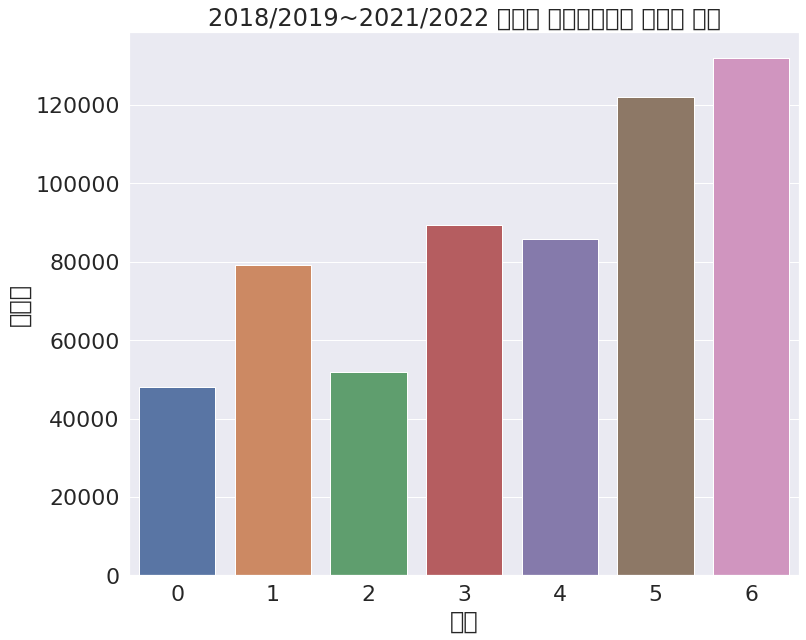

In [44]:
xlabel = ['월', '화', '수', '목', '금', '토', '일']
plt.figure(figsize=(12, 10))
x = MAN_KOVO.groupby('dayofweek')['ATTENDANCE'].sum().keys()
y = MAN_KOVO.groupby('dayofweek')['ATTENDANCE'].sum()

plt.title('2018/2019~2021/2022 요일별 남자프로배구 관중수 합계')
plt.ticklabel_format(style='plain')
ax=sns.barplot(x, y)
ax.set(xticklabels=xlabel)

sns.barplot(x, y)
plt.xlabel('요일')
plt.ylabel('관중수')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/p

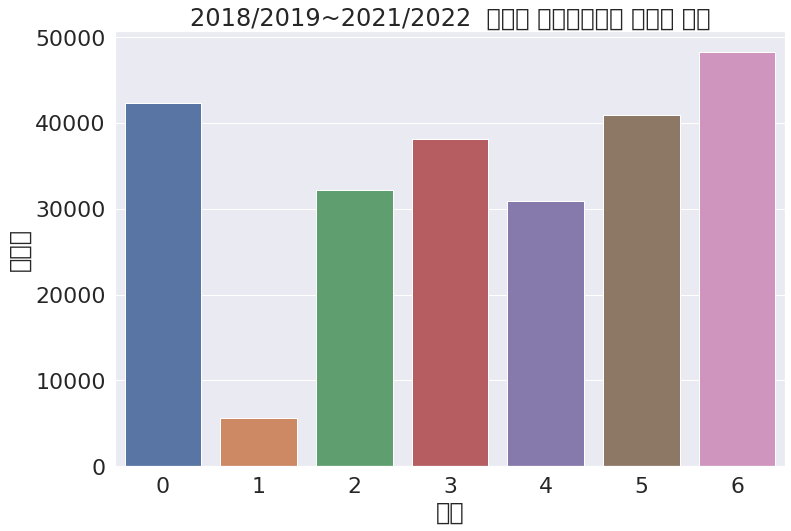

In [45]:
xlabel = ['월', '화', '수', '목', '금', '토', '일']
plt.figure(figsize=(12, 8))
x = WKBL.groupby('dayofweek')['ATTENDANCE'].sum().keys()
y = WKBL.groupby('dayofweek')['ATTENDANCE'].sum()


plt.title('2018/2019~2021/2022  요일별 여자프로농구 관중수 합계')
plt.ticklabel_format(style='plain')
ax=sns.barplot(x, y)
ax.set(xticklabels=xlabel)

sns.barplot(x, y)

plt.xlabel('요일')
plt.ylabel('관중수')
plt.show()

[Text(0, 0.5, '관중'),
 [Text(0, 0, '월'),
  Text(0, 0, '화'),
  Text(0, 0, '수'),
  Text(0, 0, '목'),
  Text(0, 0, '금'),
  Text(0, 0, '토'),
  Text(0, 0, '일')],
 Text(0.5, 0, '요일'),
 Text(0.5, 1.0, '프로농구(여자) 요일별 전체관중')]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53664 missing from current font.
  font.set_

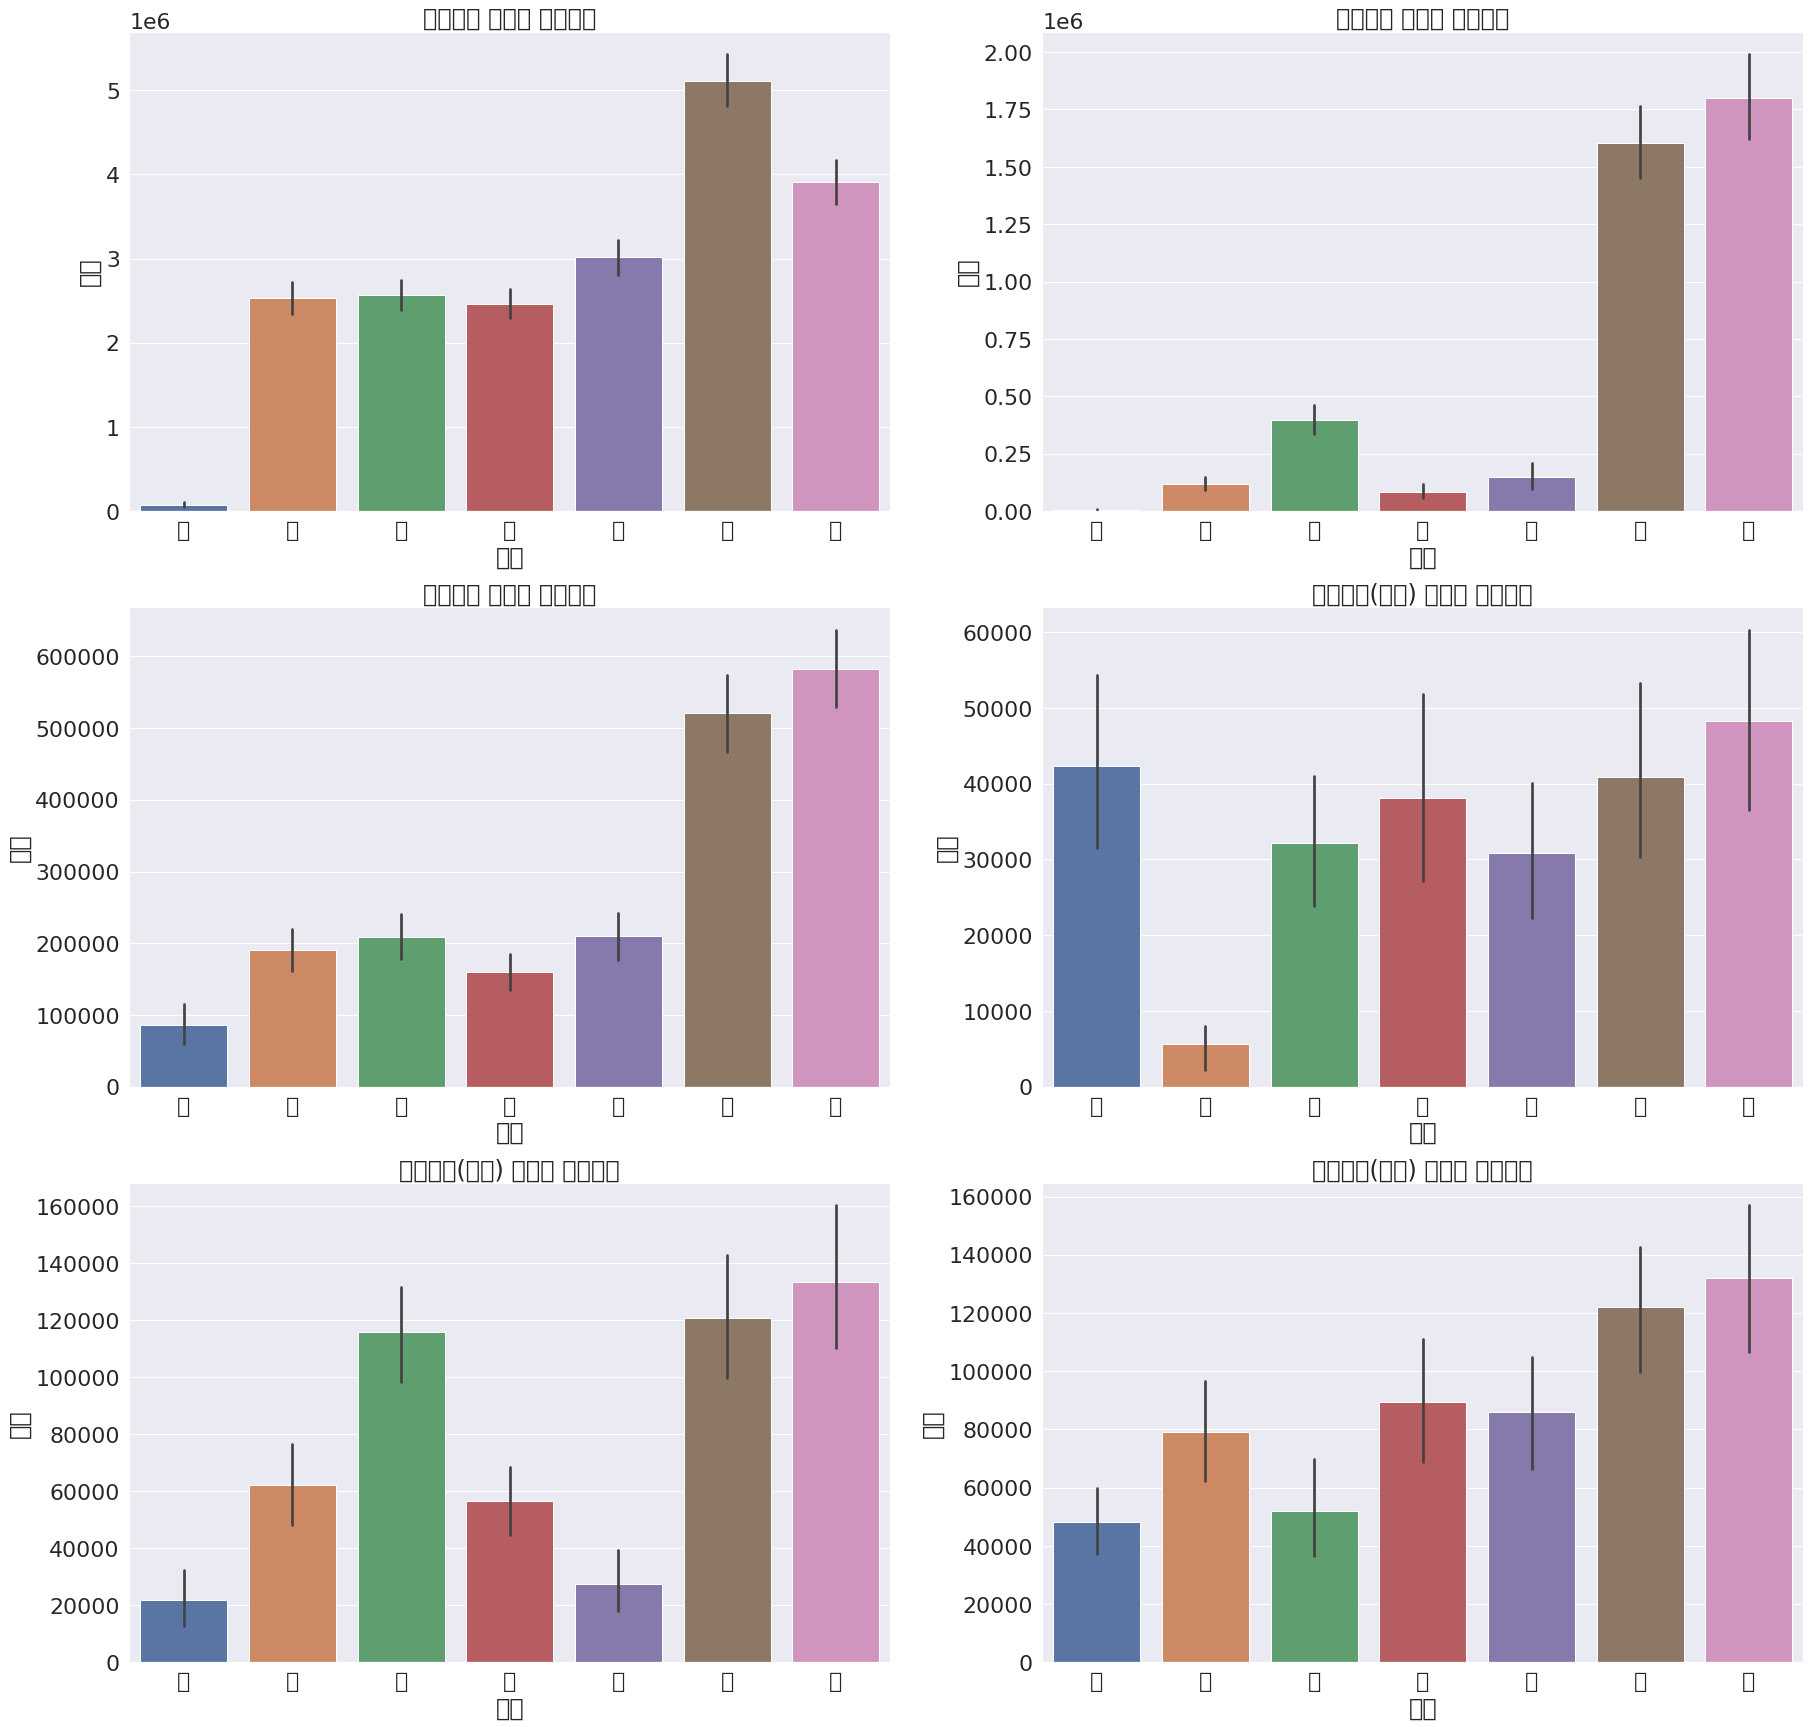

In [46]:
#종합적인 요일별 관중입장
figure, ((ax1,ax2),(ax3,ax6),(ax4,ax5)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(30,30)

sns.barplot(data=KBO, x="dayofweek", y="ATTENDANCE",estimator=sum, ax=ax1)
sns.barplot(data=KLEAGUE, x="dayofweek", y="ATTENDANCE",estimator=sum, ax=ax2)
sns.barplot(data=KBL, x="dayofweek", y="ATTENDANCE",estimator=sum, ax=ax3)
sns.barplot(data=WOMAN_KOVO, x="dayofweek", y="ATTENDANCE",estimator=sum,ax=ax4)
sns.barplot(data=MAN_KOVO, x="dayofweek", y="ATTENDANCE",estimator=sum,ax=ax5)
sns.barplot(data=WKBL, x="dayofweek", y="ATTENDANCE",estimator=sum,ax=ax6)

xlabel = ['월', '화', '수', '목', '금', '토', '일']


ax1.set(xlabel='요일',ylabel='관중', title="프로야구 요일별 전체관중",xticklabels=xlabel)
ax2.set(xlabel='요일',ylabel='관중',title="프로축구 요일별 전체관중",xticklabels=xlabel)
ax3.set(xlabel='요일',ylabel='관중',title="프로농구 요일별 전체관중",xticklabels=xlabel)
ax4.set(xlabel='요일',ylabel='관중', title="프로배구(여자) 요일별 전체관중",xticklabels=xlabel)
ax5.set(xlabel='요일',ylabel='관중', title="프로배구(남자) 요일별 전체관중",xticklabels=xlabel)
ax6.set(xlabel='요일',ylabel='관중', title="프로농구(여자) 요일별 전체관중",xticklabels=xlabel)


요일별로 전체관중현황을 종목별로 분류.

이를 평균관중현황으로 전체 종목을 합산했다.
(estimator 이용해 sum 함수로 변환, 전체 관중현황 데이터로)



*   프로야구의 경우 토요일 입장이 많음을 확인
*   프로축구는 목요일 평균관중이 많은 시각화 결과를 보여주는데, 전체 경기의 수가 수요일과 주말에 밀집된 것을 봤을 때 평균의 함정 문제가 제기된다.


*   프로농구와 남자, 여자프로배구는 주말 관중 수가 평균 및 전체관중 수에서 압도적인 비율을 차지한다.

**히트맵을 통한 평일/주말 관중입장 분포 확인**

In [47]:
#피봇테이블 생성
## 요일별 관중 입장 분포(프로축구)
football_pivot_day=pd.pivot_table(KLEAGUE, index=['is_weekend'],columns='year',values='ATTENDANCE',aggfunc="sum",fill_value=0)

football_pivot_day

year,2018,2019,2020,2021,2022
is_weekend,,,,,
0,224583,281845,5785,100475,143841
1,1033286,1550613,80855,354323,385624


In [48]:

#프로야구
baseball_pivot_day=pd.pivot_table(KBO,index=['is_weekend'],columns='year',values='ATTENDANCE',aggfunc="sum",fill_value=0)

baseball_pivot_day

year,2018,2019,2020,2021,2022
is_weekend,,,,,
0,4574147,3854052,208025,565961,1442484
1,3499595,3431956,120292,517332,1452020


In [49]:
#프로농구
basketball_pivot_day=pd.pivot_table(KBL,index=['is_weekend'],columns='SEASON',values='ATTENDANCE',aggfunc="sum",fill_value=0)

basketball_pivot_day

SEASON,2018-2019,2019-2020,2020-2021,2021-2022
is_weekend,,,,
0,429536,238068,46025,141508
1,439031,405583,64210,194402


In [50]:
#여자프로배구
Womankovo_pivot_day=pd.pivot_table(WOMAN_KOVO,index=['is_weekend'],columns='SEASON',values='ATTENDANCE',aggfunc="sum",fill_value=0)
Womankovo_pivot_day

SEASON,2018~2019,2019~2020,2020~2021,2021~2022
is_weekend,,,,
0,111823,90715,6628,74676
1,114675,82884,7569,49306


In [51]:
#여자프로농구
wkbl_pivot_day=pd.pivot_table(WKBL,index=['is_weekend'],columns='SEASON',values='ATTENDANCE',aggfunc="sum",fill_value=0)
wkbl_pivot_day

SEASON,2018~2019,2019~2020,2020~2021,2021-2022
is_weekend,,,,
0,67251,53766,0,27863
1,41971,31367,0,15773


In [52]:
#남자프로배구
mankovo_pivot_day=pd.pivot_table(MAN_KOVO,index=['is_weekend'],columns='SEASON',values='ATTENDANCE',aggfunc="sum",fill_value=0)
mankovo_pivot_day

SEASON,2018-2019,2019-2020,2020-2021,2021-2022
is_weekend,,,,
0,184877,124338,5484,39722
1,122524,95122,4548,31954


[Text(1902.029411764706, 0.5, '평일/주말'), Text(0.5, 236.50000000000023, '시즌')]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text

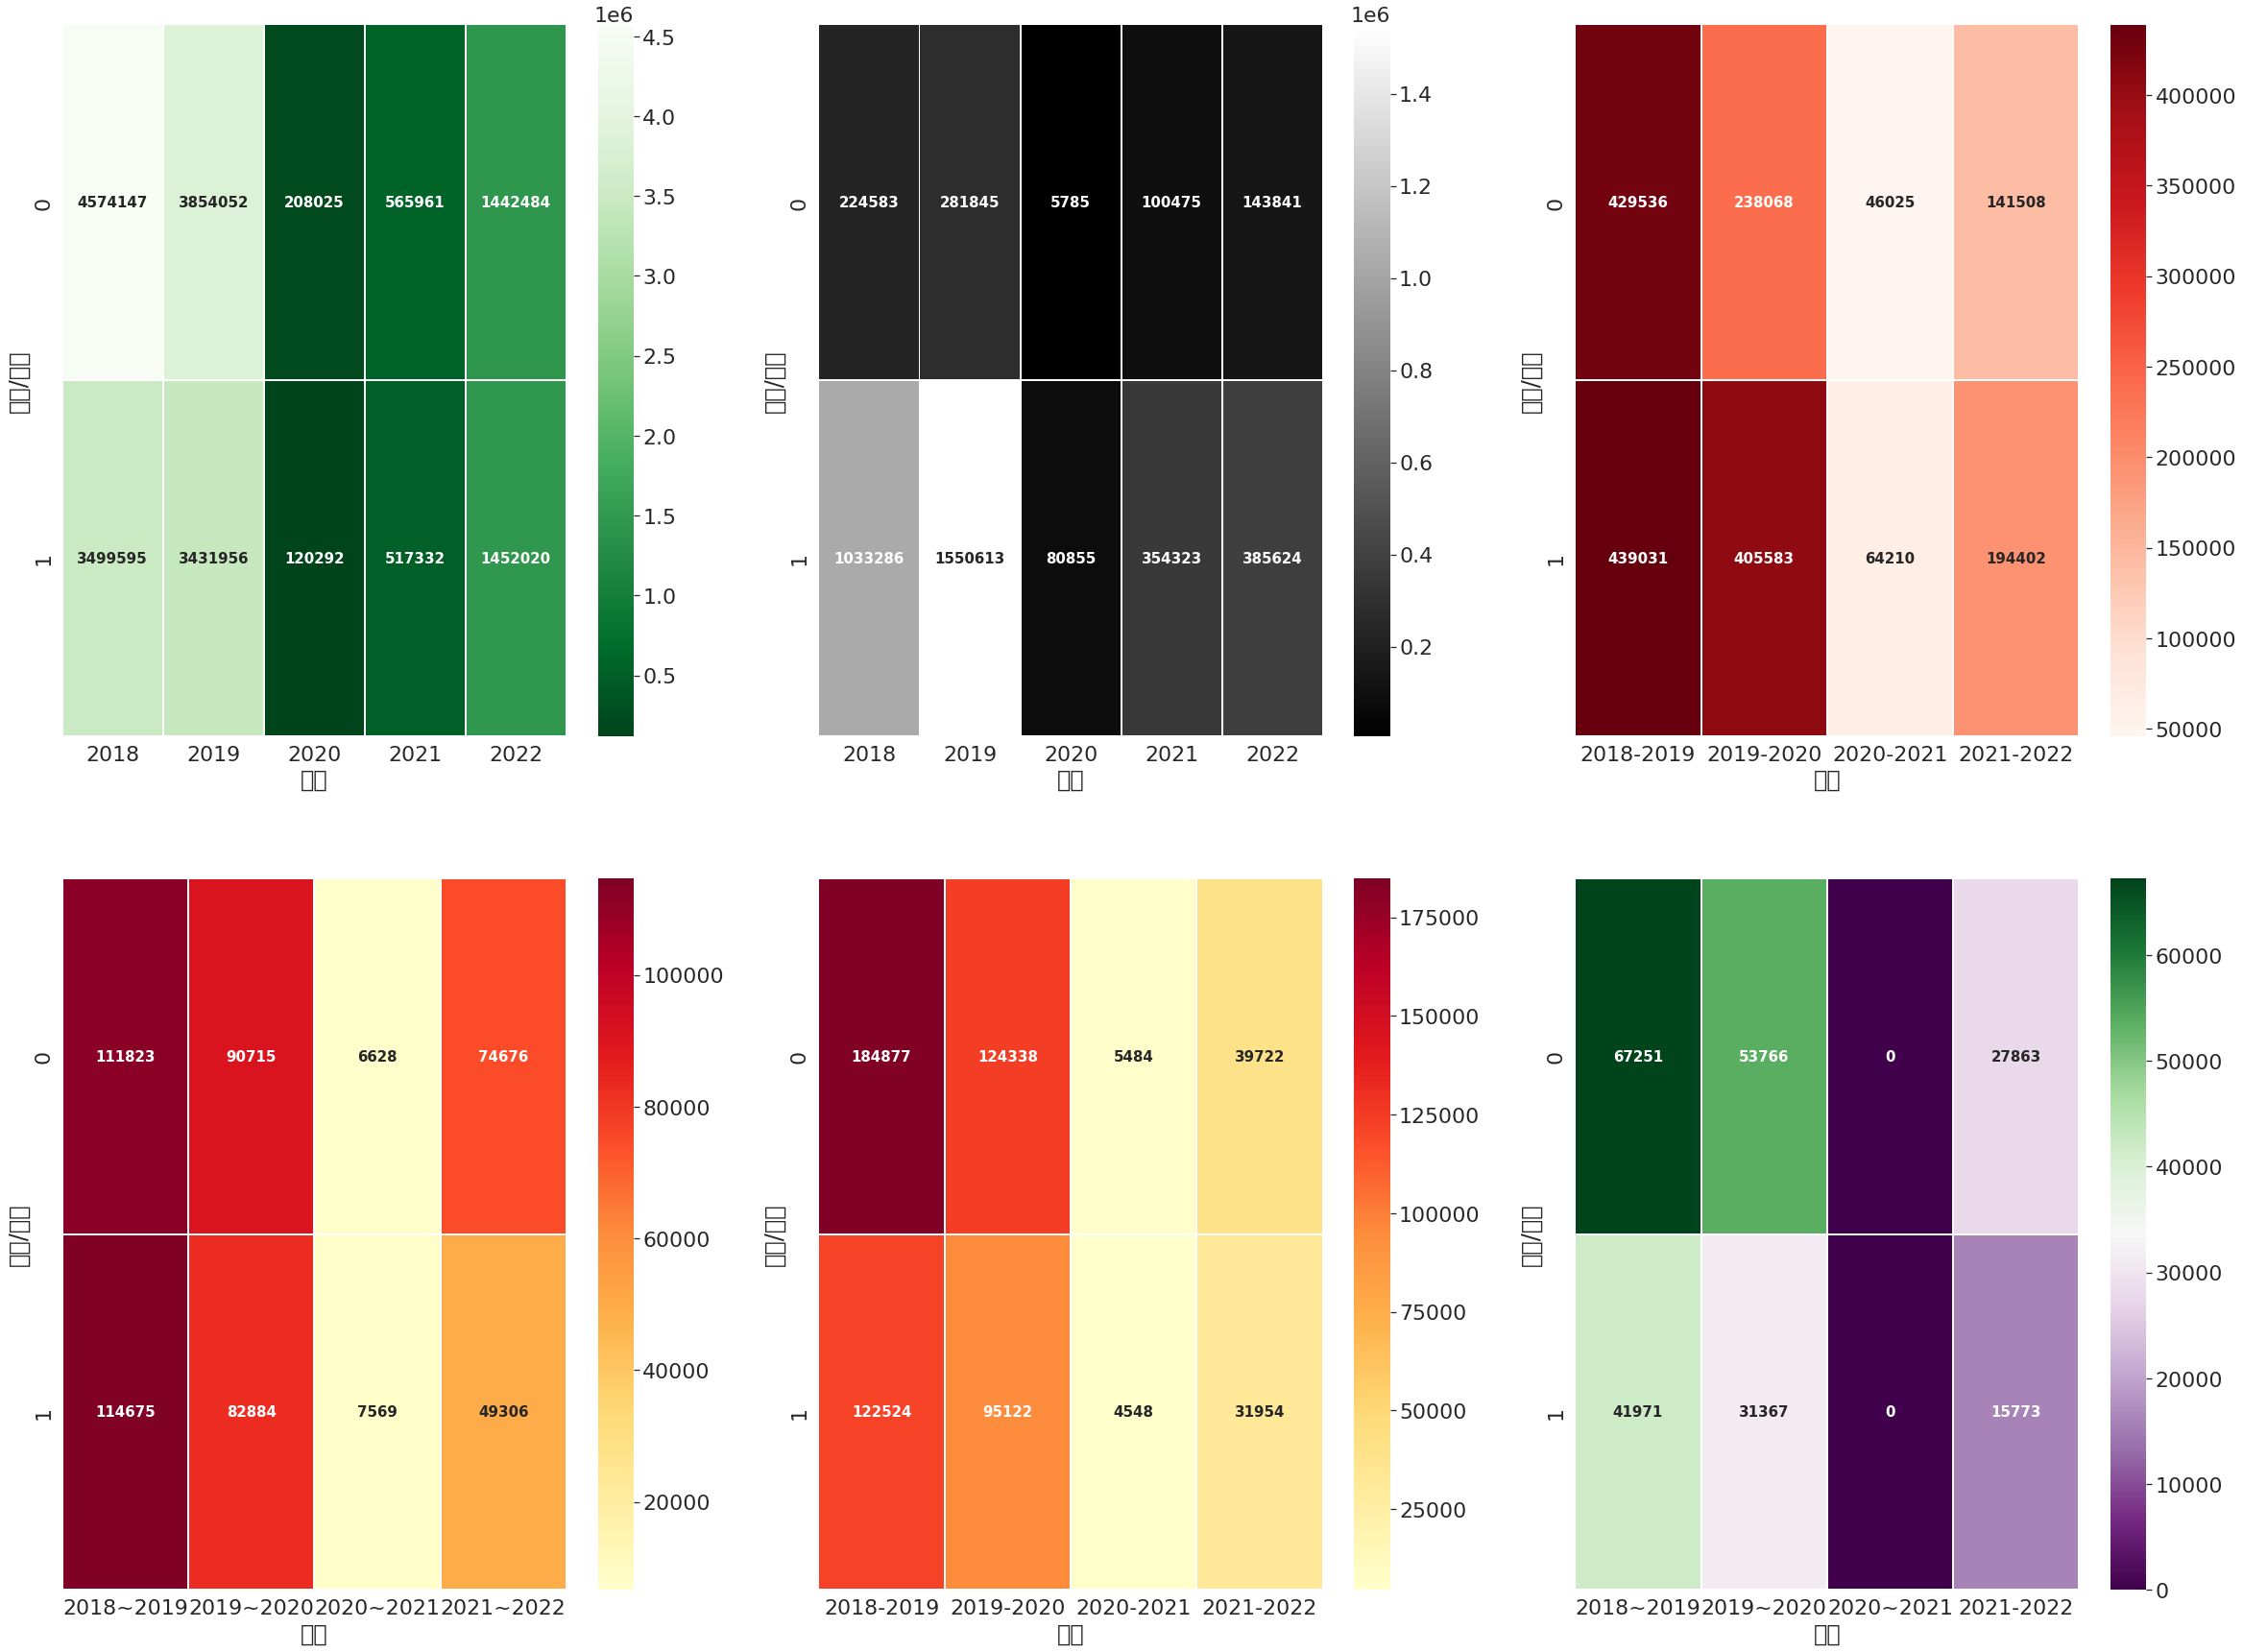

In [53]:
plt.rc('font', family='NanumBarunGothic') 
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(40,30)

sns.heatmap(baseball_pivot_day,cmap="Greens_r", ax=ax1, annot=True, fmt="d", linewidths=1,annot_kws={'fontsize': 15,'fontweight': 'bold'})
sns.heatmap(football_pivot_day,cmap="gist_gray",ax=ax2,  annot=True, fmt="d", linewidths=1,annot_kws={'fontsize': 15,'fontweight': 'bold'})
sns.heatmap(basketball_pivot_day,cmap="Reds", ax=ax3, annot=True, fmt="d", linewidths=1,annot_kws={'fontsize': 15,'fontweight': 'bold'})
sns.heatmap(data=Womankovo_pivot_day,cmap="YlOrRd",ax=ax4, annot=True, fmt="d", linewidths=1,annot_kws={'fontsize': 15,'fontweight': 'bold'})
sns.heatmap(data=mankovo_pivot_day,cmap="YlOrRd",ax=ax5, annot=True, fmt="d", linewidths=1,annot_kws={'fontsize': 15,'fontweight': 'bold'})
sns.heatmap(data=wkbl_pivot_day,cmap="PRGn",ax=ax6, annot=True, fmt="d", linewidths=1,annot_kws={'fontsize': 15,'fontweight': 'bold'})

ax1.set(xlabel='연도',ylabel='평일/주말')
ax2.set(xlabel='연도',ylabel='평일/주말')
ax3.set(xlabel='시즌',ylabel='평일/주말')
ax4.set(xlabel='시즌',ylabel='평일/주말')
ax5.set(xlabel='시즌',ylabel='평일/주말')
ax6.set(xlabel='시즌',ylabel='평일/주말')


평일, 주말별 관중 전체 입장을 각 종목별로 피벗테이블 형식으로 분류



2018~2022년 기준으로 가장 많은 관중을 동원한 종목은 프로야구이며, 이 중 2018년 전체 관중으로 주말, 평일 분류 시 평일에 457만명이, 주말에는 350만명 정도가 입장

여자농구의 경우 2020-2021 시즌 전체경기가 무관중이었고, 가장 낮은 관중 동원 기록

프로배구는 남자부에서 2018-2019 시즌까지는 여자부의 전체 관중 수를 앞섰으나, 코로나 19 이후 진행된 2021-2022 시즌 종료 시점에서 주말 및 평일 관중 비교에서 여자부는 평일 7만명대 관중을 기록한 반면, 남자부는 4만명을 못미친 상태


**2018~2022 KBO리그(야구) 관중 입장 상관관계 EDA**

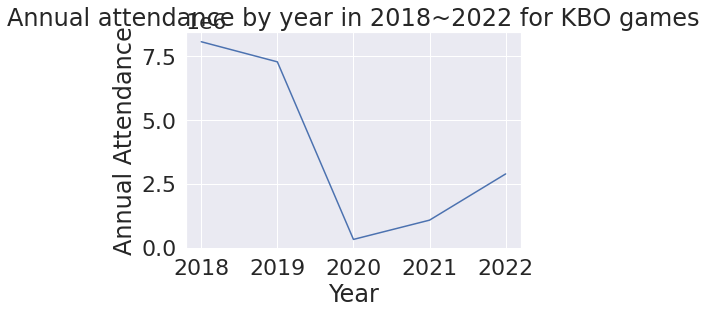

In [54]:
#관중 상관관계 선분석(프로야구)
from  matplotlib.ticker import FuncFormatter
grouped_year = pd.DataFrame(KBO.groupby('year').sum()).astype(int)

grouped_year['ATTENDANCE'] = grouped_year['ATTENDANCE'].astype(int)

plt.plot(grouped_year['ATTENDANCE'])
plt.xlabel('Year')
plt.ylabel('Annual Attendance')
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))


plt.title('Annual attendance by year in 2018~2022 for KBO games')
plt.show()

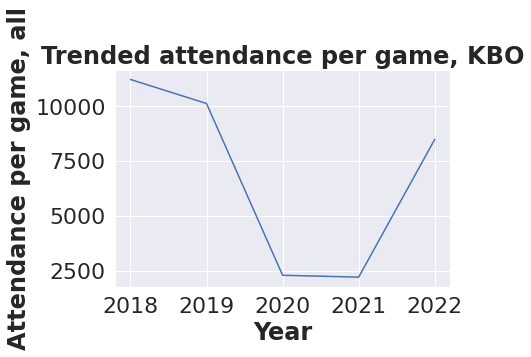

In [55]:
#경기당 관중 비율
from  matplotlib.ticker import FuncFormatter
grouped_year['attendance_per_game'] = grouped_year['ATTENDANCE'] / grouped_year['game'] #그룹화

plt.plot(grouped_year['attendance_per_game'])

plt.xlabel('Year',fontweight='bold')
plt.ylabel('Attendance per game, all',fontweight='bold')
plt.title('Trended attendance per game, KBO',fontweight='bold')
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
plt.ylim()

plt.show()

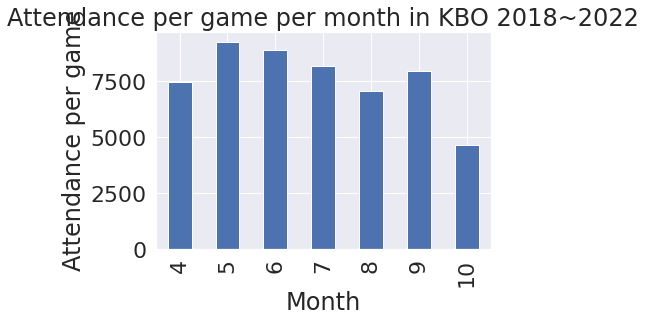

In [56]:
#월별 평균 관중입장

grouped_month = KBO.groupby(by=KBO.month).sum()
grouped_month = grouped_month[grouped_month.index != 3] # Exclude March because it's a smaller sample size
attendance_per_month = grouped_month['ATTENDANCE'] / grouped_month['game']

attendance_per_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Attendance per game')
plt.title('Attendance per game per month in KBO 2018~2022')

plt.show()

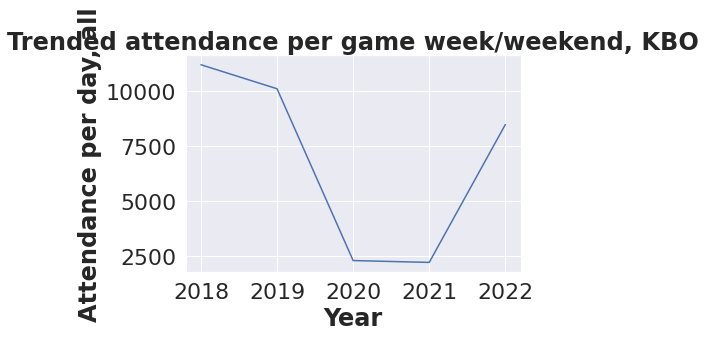

In [57]:
from  matplotlib.ticker import FuncFormatter
grouped_year['attendance_per_weekday/end'] = grouped_year['ATTENDANCE'] / grouped_year['is_weekend'] #그룹화

plt.plot(grouped_year['attendance_per_game'])

plt.xlabel('Year',fontweight='bold')
plt.ylabel('Attendance per day, all',fontweight='bold')
plt.title('Trended attendance per game week/weekend, KBO',fontweight='bold')
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
plt.ylim()

plt.show()

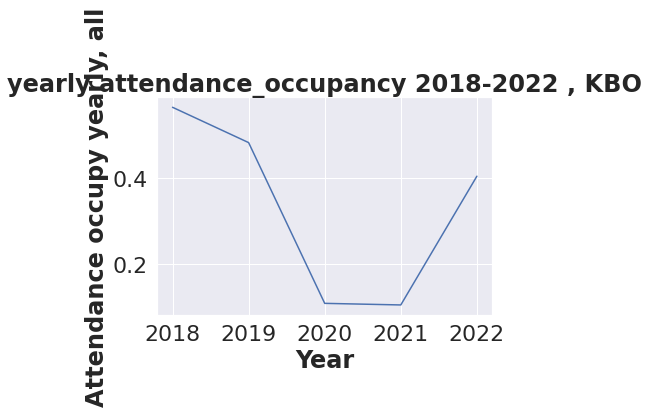

In [58]:
from  matplotlib.ticker import FuncFormatter
grouped_year['attendance_occupancy'] = grouped_year['ATTENDANCE'] / grouped_year['attendance_capacity'] #그룹화

plt.plot(grouped_year['attendance_occupancy'])
plt.plot(kind='density')
plt.xlabel('Year',fontweight='bold')
plt.ylabel('Attendance occupy yearly, all',fontweight='bold')
plt.title('yearly attendance_occupancy 2018-2022 , KBO',fontweight='bold')
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
plt.ylim()

plt.show()

# 경기당 평균관중과 주말/평일 구분 평균관중 상관관계(프로야구)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


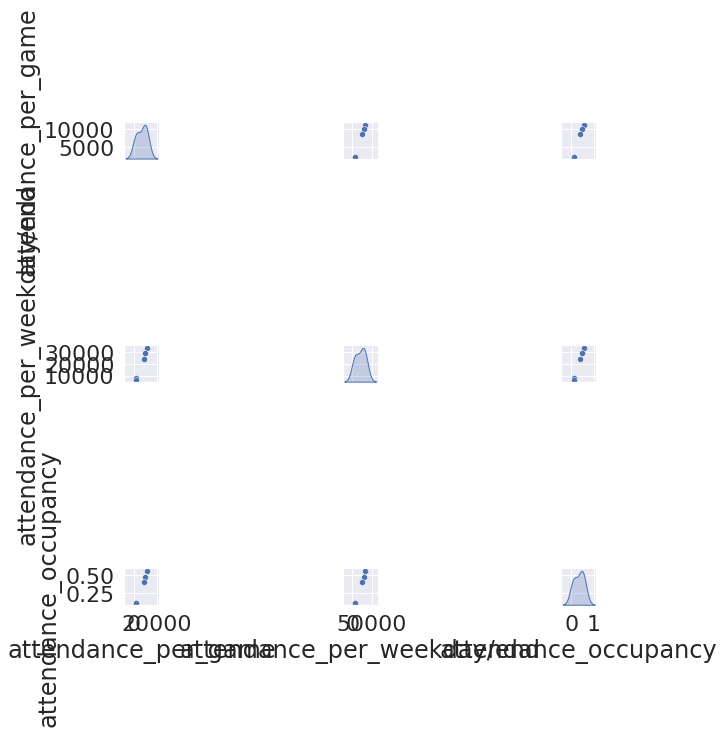

In [59]:
corr_columns = ['attendance_per_game','attendance_per_weekday/end','attendance_occupancy']

sns.pairplot(grouped_year[corr_columns], diag_kind = 'kde',size=3)

plt.show()

In [60]:
# 연, 월로 된 그룹화
df_m_y = pd.DataFrame(KBO.groupby(by=[KBO.year, KBO.month]).sum())

In [61]:
df_m_y['attendance_per_game'] = df_m_y['ATTENDANCE'] / df_m_y['game']
df_m_y['attendance_per_weekday/end']=  df_m_y['ATTENDANCE'] / df_m_y['is_weekend']
df_m_y['attendance_occupancy']=df_m_y['ATTENDANCE']/df_m_y['attendance_capacity']

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


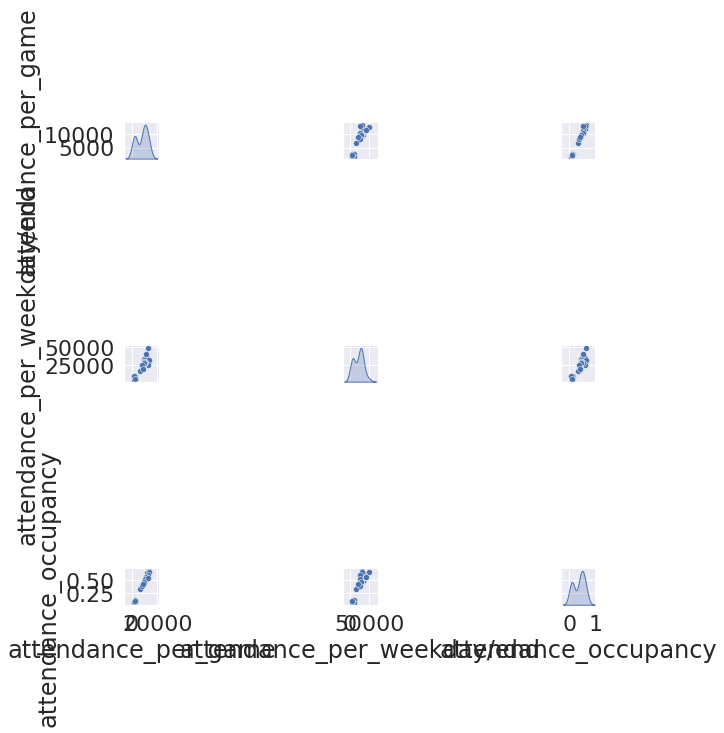

In [62]:
sns.pairplot(df_m_y[corr_columns], diag_kind = 'kde',size=3)

plt.show()

# 팀별 홈경기 평균관중 분석(프로야구)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46160 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_

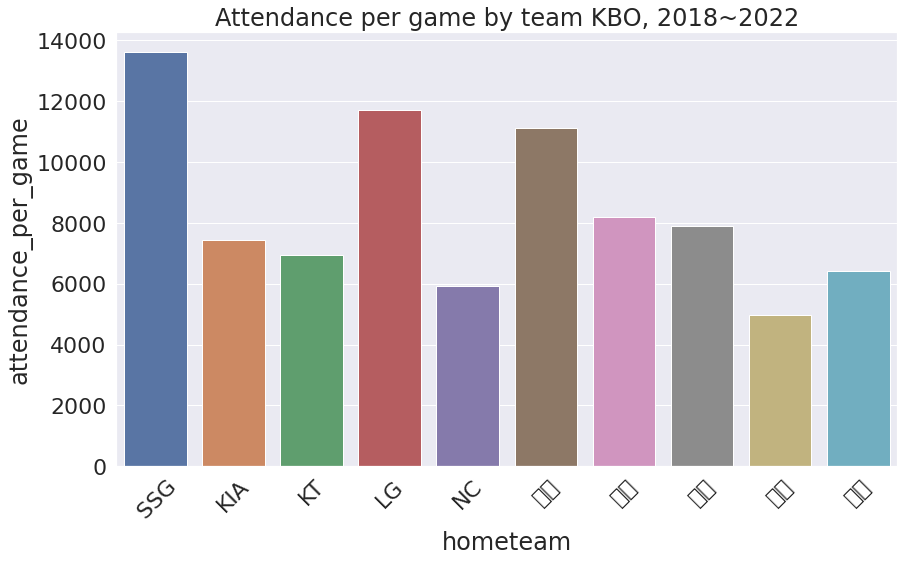

In [63]:
#팀당 홈경기 기준 평균관중 분석

## Create a dataframe grouped by team and see how average attendance per game changes per team
plt.rc('font', family='NanumBarunGothic') 
df_teams = pd.DataFrame(KBO[['hometeam','ATTENDANCE','game']].groupby(by='hometeam').sum())
df_teams['attendance_per_game'] = df_teams['ATTENDANCE'] / df_teams['game']
df_teams= df_teams[df_teams.index != 'SSG'] #SSG 중복컬럼

fig = plt.figure(figsize=(14, 8))

ax= sns.barplot(x=df_teams.index, y='attendance_per_game', data=df_teams)

plt.xticks(rotation=45)
plt.title('Attendance per game by team KBO, 2018~2022')

plt.show()

데이터 중복 문제로 SSG 랜더스 팀의 컬럼이 두 개로 나오는 현상을 해결.

2018~2022년 기준으로 팀별 평균관중 입장에서 LG 트윈스, 두산 베어스, SSG 랜더스가 상위 관중 3팀을 차지했다.

# 2018~2022 K리그(축구) 관중 상관관계 EDA

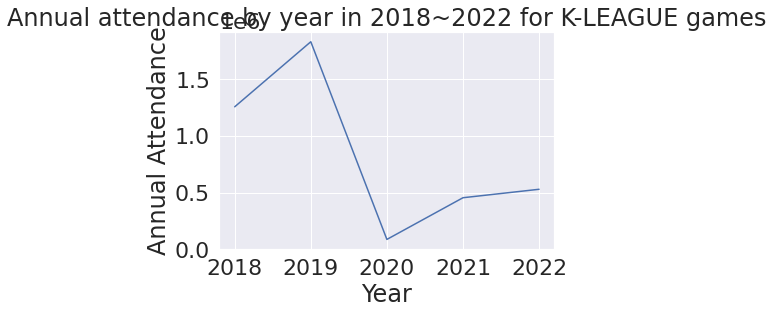

In [64]:
#프로축구 2018~2022 관중 상관관계
from  matplotlib.ticker import FuncFormatter
grouped_year = pd.DataFrame(KLEAGUE.groupby('year').sum())

grouped_year['ATTENDANCE'] = grouped_year['ATTENDANCE'].astype(int)

plt.plot(grouped_year['ATTENDANCE'])
plt.xlabel('Year')
plt.ylabel('Annual Attendance')
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
plt.title('Annual attendance by year in 2018~2022 for K-LEAGUE games')


plt.show()



*   앞에서 확인했지만, 2018~2022 프로축구 연간 관중수를 선형으로 표현하면 다음과 같다.
*   2018~2022년 기준으로 2019년 184만명의 관중이 입장했고, 코로나 19 이후 급격한 감소를 보였다가 2022년 관중 입장 제한이 풀리면서 완만한 증가를 보여준다.



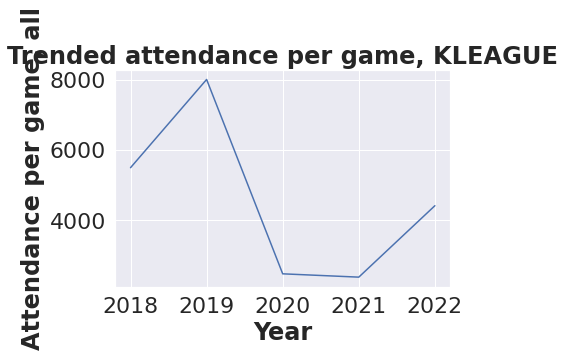

In [65]:
grouped_year['attendance_per_game'] = grouped_year['ATTENDANCE'] / grouped_year['game'] #그룹화
from  matplotlib.ticker import FuncFormatter
plt.plot(grouped_year['attendance_per_game'])


plt.xlabel('Year',fontweight='bold')
plt.ylabel('Attendance per game, all',fontweight='bold')
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
plt.title('Trended attendance per game, KLEAGUE',fontweight='bold')
plt.ylim()

plt.show()

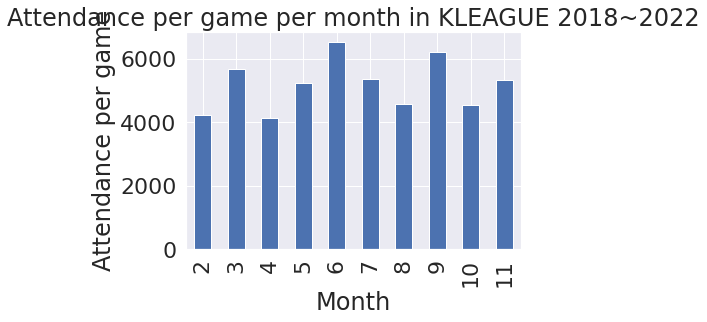

In [66]:
#월별 평균 관중인원
grouped_month = KLEAGUE.groupby(by=KLEAGUE.month).sum()
grouped_month = grouped_month[grouped_month.index != 12] # Exclude December because it's a smaller sample size
attendance_per_month = grouped_month['ATTENDANCE'] / grouped_month['game']

attendance_per_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Attendance per game')
plt.title('Attendance per game per month in KLEAGUE 2018~2022')

plt.show()

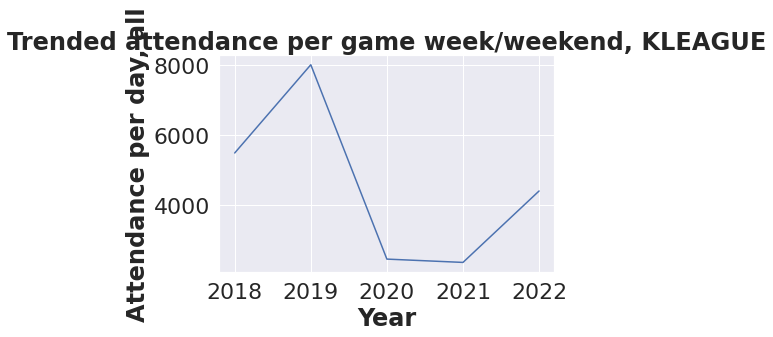

In [67]:
grouped_year['attendance_per_weekday/end'] = grouped_year['ATTENDANCE'] / grouped_year['is_weekend'] #그룹화

plt.plot(grouped_year['attendance_per_game'])

from  matplotlib.ticker import FuncFormatter
plt.xlabel('Year',fontweight='bold')
plt.ylabel('Attendance per day, all',fontweight='bold')
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
plt.title('Trended attendance per game week/weekend, KLEAGUE',fontweight='bold')
plt.ylim()

plt.show()

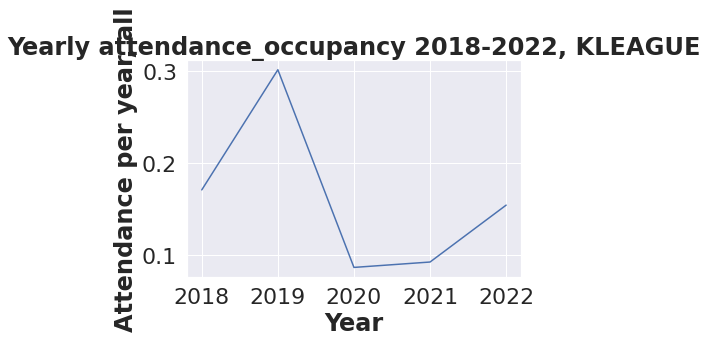

In [68]:
grouped_year['attendance_per_occupy'] = grouped_year['ATTENDANCE'] / grouped_year['attendance_capacity']
plt.plot(grouped_year['attendance_per_occupy'])
plt.plot(kind='density')

from  matplotlib.ticker import FuncFormatter
plt.xlabel('Year',fontweight='bold')
plt.ylabel('Attendance per year, all',fontweight='bold')
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))

plt.title('Yearly attendance_occupancy 2018-2022, KLEAGUE',fontweight='bold')
plt.ylim()

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


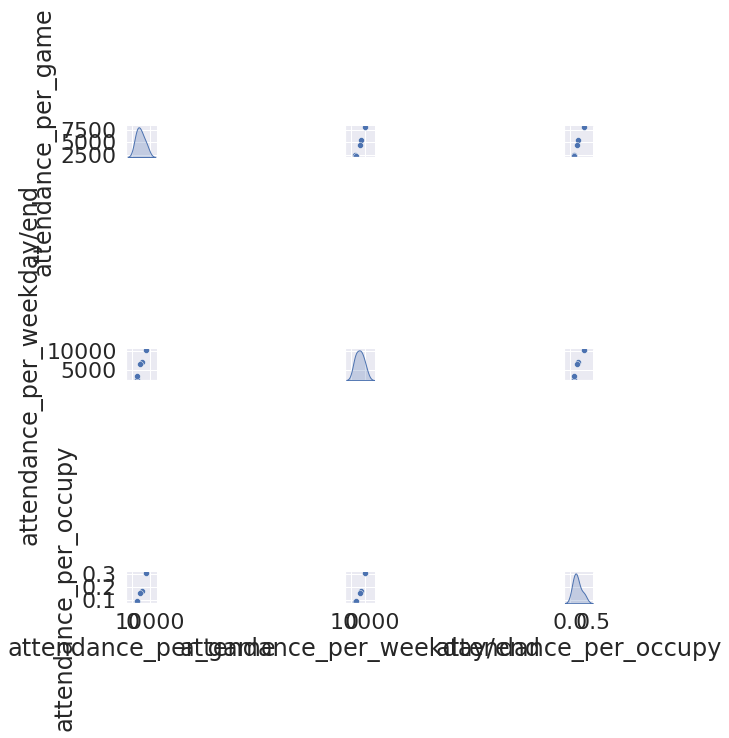

In [69]:
corr_columns = ['attendance_per_game','attendance_per_weekday/end','attendance_per_occupy']

sns.pairplot(grouped_year[corr_columns], diag_kind = 'kde',size=3)

plt.show()

In [70]:
# 연, 월로 된 그룹화
df_m_y = pd.DataFrame(KLEAGUE.groupby(by=[KLEAGUE.year, KLEAGUE.month]).sum())

In [71]:
df_m_y['attendance_per_game'] = df_m_y['ATTENDANCE'] / df_m_y['game']
df_m_y['attendance_per_weekday/end']=  df_m_y['ATTENDANCE'] / df_m_y['is_weekend']
df_m_y['attendance_per_occupy']=df_m_y['ATTENDANCE']/df_m_y['attendance_capacity']

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


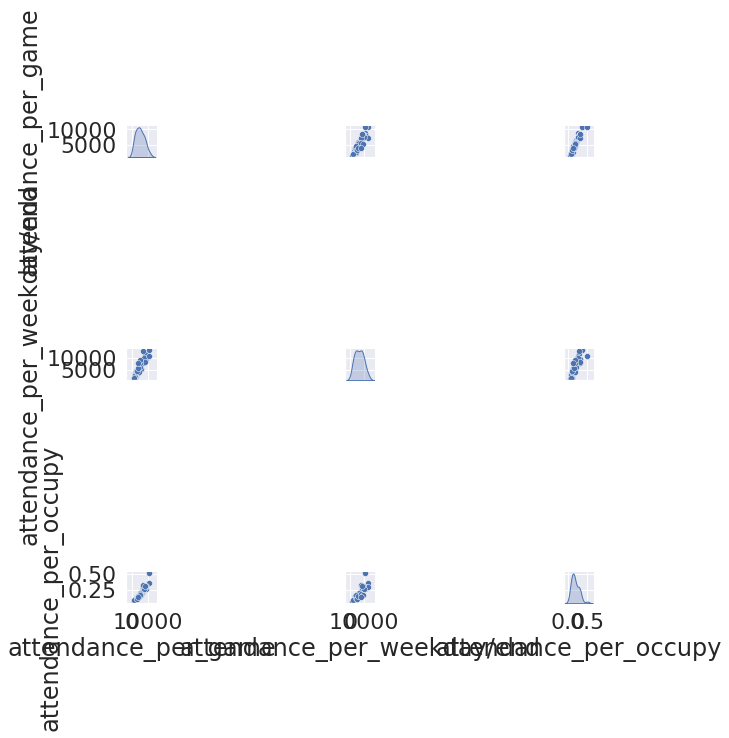

In [72]:
sns.pairplot(df_m_y[corr_columns], diag_kind = 'kde',size=3)

plt.show()

경기당 평균관중입장, 좌석점유율, 평일 및 주말 입장평균을 시각화로 표현했을때, 프로축구(K리그) 관중은 양의 방향으로 분포됨을 확인

좌석 점유율의 경우 분포가 0.2 ~ 0.3대로 나타나며, 보통 5000~8000명대의 입장 분포를 보여주고 있다.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44305 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_

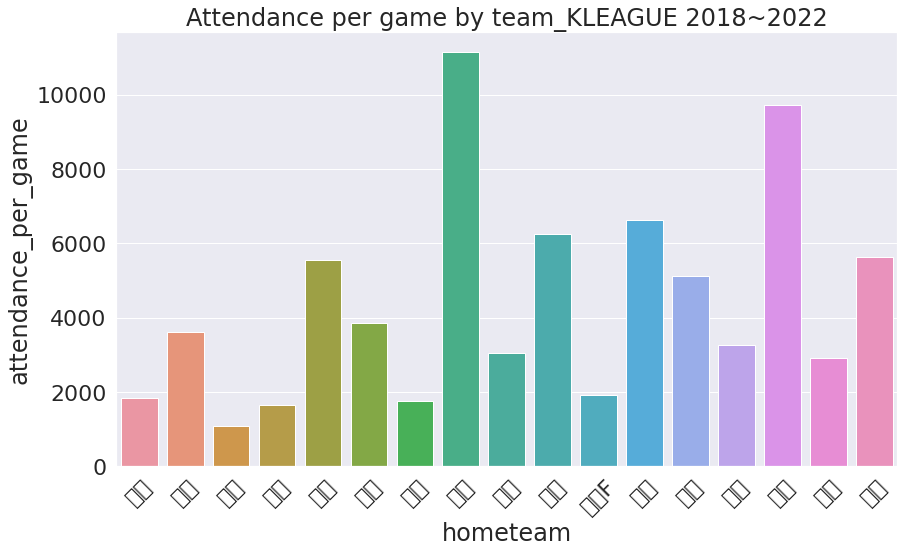

In [73]:
#팀당 홈경기 기준 평균관중 분석

## Create a dataframe grouped by team and see how average attendance per game changes per team
plt.rc('font', family='NanumBarunGothic') 
df_teams = pd.DataFrame(KLEAGUE[['hometeam','ATTENDANCE','game']].groupby(by='hometeam').sum())
df_teams['attendance_per_game'] = df_teams['ATTENDANCE'] / df_teams['game']
df_teams= df_teams[df_teams.index != '대전'] #대전의 경우 승격플레이오프 외에 1부리그팀과 해당 기간 경기 없었음

fig = plt.figure(figsize=(14, 8))

ax= sns.barplot(x=df_teams.index, y='attendance_per_game', data=df_teams)

plt.xticks(rotation=45)
plt.title('Attendance per game by team_KLEAGUE 2018~2022')

plt.show()

대전은 2021년 승강플레이오프 이외 1부리그 팀과 경기가 없었기 때문에, 대상에서 제외


평균 홈관중 동원에서 FC서울, 전북현대, 울산현대 순으로 나타났다.

대구의 경우 수원삼성과 비슷한 평균관중인원을 보이는데, 경기장 이전 후 전용구장 효과로 인한 관중동원력에서 증가 추세를 보이고 있다.

# 전체 상관관계 결론(프로야구)

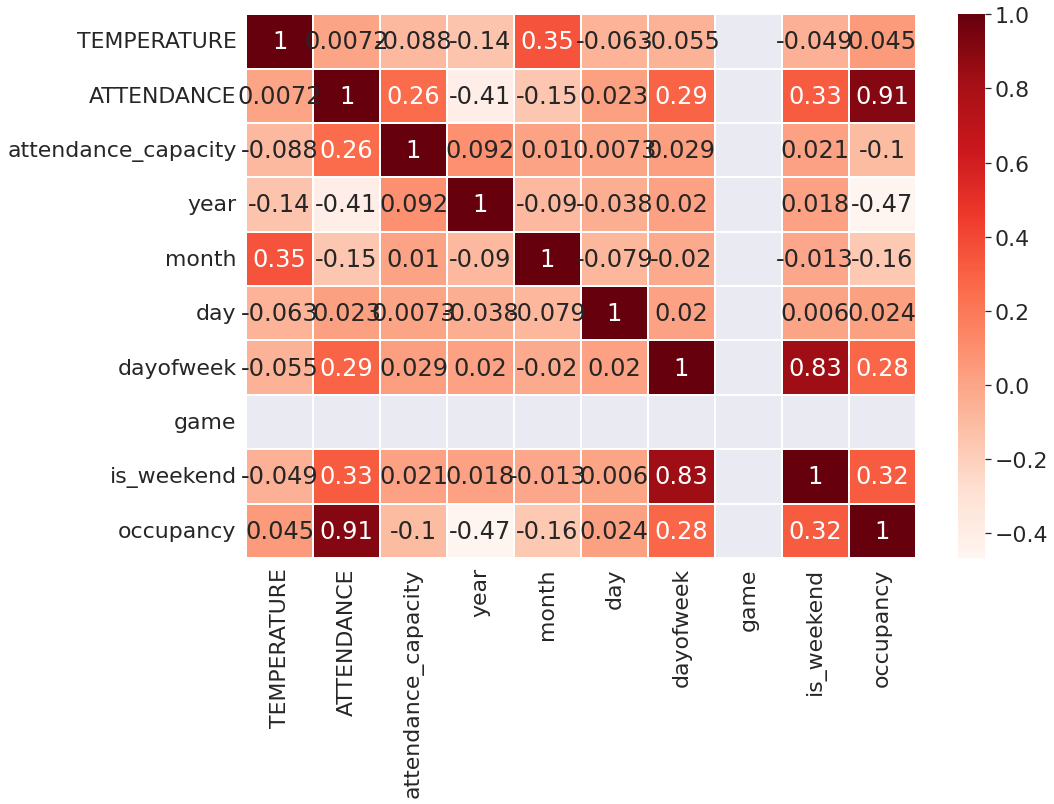

In [74]:
plt.figure(figsize=(15, 10)) 
sns.heatmap(KBO.corr(),cmap="Reds",annot=True,linewidths=1)

In [75]:
KBO.corr()['ATTENDANCE']

TEMPERATURE            0.007247
ATTENDANCE             1.000000
attendance_capacity    0.257850
year                  -0.406101
month                 -0.153580
day                    0.023191
dayofweek              0.290341
game                        NaN
is_weekend             0.329512
occupancy              0.911919
Name: ATTENDANCE, dtype: float64

프로야구 관중 상관관계를 데이터 기준으로 분석했을때, 주말/평일 변수가 가장 높았다. 반면 연도, 월 상관관계는 음의 값으로 나타나는데 기온과의 상관관계를 보고 싶어했던 입장에서 이 부분에서 수정이 필요하다.

기온 및 관중 간 상관관계는 음의 값으로 표현되었다.

- 수정 완료(실수형으로 변환 후 회귀분석 진행) 

# K리그(프로축구) 전체 상관관계 결론

In [76]:
KLEAGUE.corr()['ATTENDANCE']

TEMPERATURE            0.027524
ATTENDANCE             1.000000
attendance_capacity    0.386943
year                  -0.272712
month                  0.043602
day                   -0.005830
dayofweek              0.190328
is_weekend             0.156461
game                        NaN
occupancy              0.666781
Name: ATTENDANCE, dtype: float64

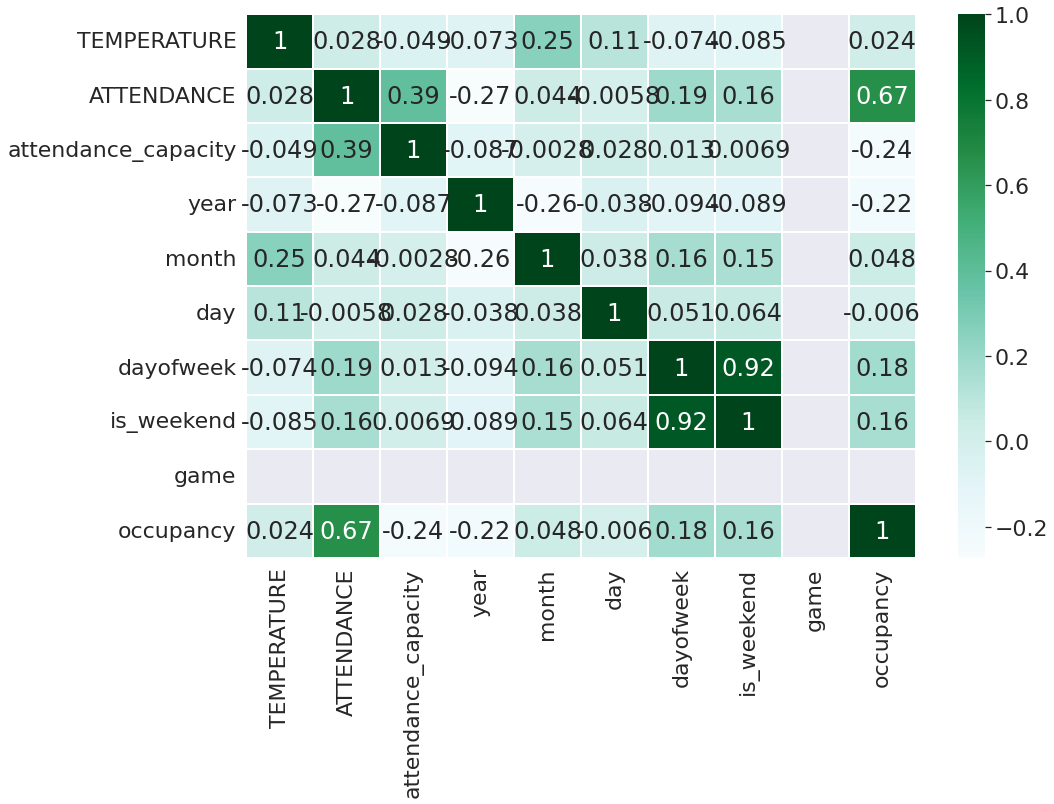

In [77]:
plt.figure(figsize=(15, 10)) 
sns.heatmap(KLEAGUE.corr(),cmap="BuGn",annot=True,linewidths=1)


프로축구의 경우 경기장 수용인원과 관중 상관관계가 0.3으로 나타남. 반면, 요일 및 평일/주말 구분 변수는 0.12~0.14대로 예상에 비해 상관관계가 적음을 보임

#기온 및 관중 선형회귀 분석 진행(프로야구, 프로축구)

프로야구의 경기당 관중과 기온 간 상관관계: 0.01


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47196 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50556 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_

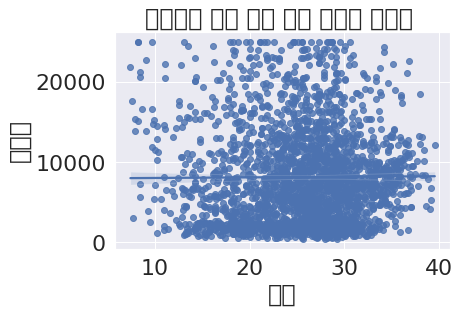

In [78]:
#기온과 관중수간 선형분석
KBO['attendance_per_game'] = KBO['ATTENDANCE'] / KBO['game'] ##경기당 입장 수

plt.rc('font',family='NanumBarunGothic')
ax = sns.regplot(x="TEMPERATURE", y='attendance_per_game', data = KBO)
sns.set(font_scale=2, style='darkgrid')
plt.title('프로야구 평균 기온 대비 경기당 관중수 ')

plt.xlabel('기온')
plt.ylabel('관중수')
print('프로야구의 경기당 관중과 기온 간 상관관계: %.2f' % KBO[['TEMPERATURE', 'attendance_per_game']].corr().iloc[0,1])

프로축구 경기당 관중과 기온 간 상관관계: 0.03


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47196 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_

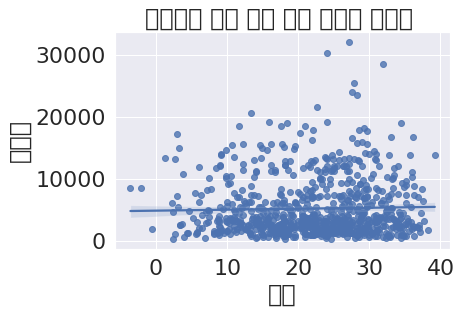

In [79]:
KLEAGUE['attendance_per_game'] = KLEAGUE['ATTENDANCE'] / KLEAGUE['game'] ##경기당 입장 수

plt.rc('font',family='NanumBarunGothic')
ax=sns.regplot(x="TEMPERATURE", y='attendance_per_game', data=KLEAGUE)
sns.set(font_scale=2, style='darkgrid')
plt.title('프로축구 평균 기온 대비 경기당 관중수 ')

plt.xlabel('기온')
plt.ylabel('관중수')
print('프로축구 경기당 관중과 기온 간 상관관계: %.2f' % KLEAGUE[['TEMPERATURE', 'attendance_per_game']].corr().iloc[0,1])

# 관중예측 모델 구축(프로야구)

In [80]:
## 모델 개발을 위한 전처리
KBO.isna().sum()

DATE                   0
DAY                    0
hometeam               0
awayteam               0
STADIUM                0
WEATHER                0
TEMPERATURE            0
ATTENDANCE             0
attendance_capacity    0
year                   0
month                  0
day                    0
dayofweek              0
game                   0
is_weekend             0
occupancy              0
attendance_per_game    0
dtype: int64

In [81]:
## 라벨 인코딩, 더미변수 통한 범주형 변수 수치화
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()






weather_dummies=pd.get_dummies(KBO['WEATHER'])
team_dummies=pd.get_dummies(KBO['hometeam'])
KBO=pd.concat([KBO,weather_dummies,team_dummies], axis=1)
KBO.head()



KBO.drop(['DAY'],axis=1)
KBO.drop(['occupancy'],axis=1)
KBO.drop(['STADIUM'],axis=1)

,DATE,DAY,hometeam,awayteam,WEATHER,TEMPERATURE,ATTENDANCE,attendance_capacity,year,month,...,KIA,KT,LG,NC,SSG,두산,롯데,삼성,키움,한화
0,2022-07-06,수,한화,NC,흐림,35.4,2726.0,12000,2022,7,...,0,0,0,0,0,0,0,0,0,1
1,2022-07-06,수,KIA,KT,구름많음,34.5,6269.0,20500,2022,7,...,1,0,0,0,0,0,0,0,0,0
2,2022-07-06,수,삼성,LG,비,33.8,4673.0,24000,2022,7,...,0,0,0,0,0,0,0,1,0,0
3,2022-07-06,수,SSG,롯데,구름많음,33.2,6859.0,23000,2022,7,...,0,0,0,0,0,0,0,0,0,0
4,2022-07-06,수,두산,키움,비,33.3,2930.0,25000,2022,7,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3034,2018-03-24,토,NC,LG,맑음,19.4,11000.0,11000,2018,3,...,0,0,0,1,0,0,0,0,0,0
3035,2018-03-24,토,두산,삼성,구름많음,13.1,25000.0,25000,2018,3,...,0,0,0,0,0,1,0,0,0,0
3036,2018-03-24,토,SSG,롯데,흐림,8.2,25000.0,23000,2018,3,...,0,0,0,0,1,0,0,0,0,0
3037,2018-03-24,토,KIA,KT,구름조금,17.8,20500.0,20500,2018,3,...,1,0,0,0,0,0,0,0,0,0


In [82]:
KBO.dtypes

DATE                   datetime64[ns]
DAY                            object
hometeam                       object
awayteam                       object
STADIUM                        object
WEATHER                        object
TEMPERATURE                   float64
ATTENDANCE                    float64
attendance_capacity             int64
year                            int64
month                           int64
day                             int64
dayofweek                       int64
game                            int64
is_weekend                      int64
occupancy                     float64
attendance_per_game           float64
구름많음                            uint8
구름조금                            uint8
맑음                              uint8
비                               uint8
흐림                              uint8
 SSG                            uint8
KIA                             uint8
KT                              uint8
LG                              uint8
NC          

In [83]:
## 후진 소거법
import statsmodels.api as sm
variables=KBO.columns[:-2].tolist() ##설명변수 리스트

y=KBO['attendance_per_game']
selected_variables=variables
sl_remove=0.05

sv_per_stop=[] ##스텝별 선택된 변수들
adjusted_r_squared=[] ##스텝별 수정된 결정계수
steps=[] 
step=0

while len(selected_variables) > 0:
    X = sm.add_constant(KBO[selected_variables+[col]])
    p_vals = sm.OLS(y,X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
    max_pval = p_vals.max() ## 최대 p-value
    if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
        remove_variable = p_vals.idxmax()
        selected_variables.remove(remove_variable)
 
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(KBO[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

NameError: ignored

In [ ]:
selected_variables

In [ ]:
## 단계별 선택법
import statsmodels.api as sm
variables=KBO.columns[:-2].tolist() ##설명 변수 리스트

y=KBO['attendance_per_game']
selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = KBO[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        results=model
        print(results.summary())
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = KBO[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break

In [ ]:
selected_variables

In [ ]:
#선형회귀 코드 입력 및 테스트, 실행 모델
from sklearn.linear_model import LinearRegression, Lasso ,Ridge
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split #훈련세트 분리

In [ ]:
y=KBO['attendance_per_game'] ## 종속변수= 경기당 관중

In [ ]:
x_b=KBO[['year','month','day','dayofweek','두산','TEMPERATURE']] ## 독립변수= 홈팀, 기온, 경기장 수용인원, 연월일, 주말 및 평일 가변수

In [ ]:
from sklearn.preprocessing import scale
from sklearn.metrics import mean_absolute_error as mae # mae 코드 호출

X = scale(x_b) # 변수를 일반적인 크기로 조정
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 15) ##테스트셋, 훈련셋 70:30으로 분리

linreg_scale = LinearRegression()

linreg_scale.fit(X_train, y_train)

preds = linreg_scale.predict(X_test)
print(preds) ## 예측값 출력


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
import numpy as np
import pandas as pd
prediction = pd.DataFrame(preds, columns=['preds']).to_csv('KBO_prediction.csv')

In [ ]:
mae_linreg_s = mae(y_test, preds)

print('MAE (Mean Absolute Error)를 통한 평가지표 값: %.2f' %mae_linreg_s) ## MAE (Mean Absolute Error)를 통한 평가지표 값 검증

In [ ]:
##RMSE 평가지표 값을 통한 관중 예측값 결과 확인

from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(y_test, preds) 
np.sqrt(MSE)
print('RMSE 평가를 통한 프로야구 관중 선형회귀모델 값 : %.2f' %np.sqrt(MSE))

In [ ]:
from sklearn.metrics import explained_variance_score, mean_squared_error, mean_absolute_error, r2_score
print('r2_score: {}'.format(r2_score(y_test,preds)))

In [ ]:
## Plot actual and predicted values for Linear regression

plt.plot(y_test,preds, marker='.',linestyle='none')
plt.title('Actual (x-axis) vs. Predicted (y-axis)\n attendance per game', fontweight='bold')

plt.text(10000, -10000, 'R-squared = %.2f' %r2_score(y_test,preds), size=10)
plt.xticks([0,10000,20000])
plt.yticks([0,10000,20000])

plt.show()  

In [ ]:
## LASSO, ridge 활용한 데이터 스케일링
ridge_s = Ridge()
    
ridge_s.fit(X_train, y_train)

ridge_pred_s = ridge_s.predict(X_test)
    
mae_ridge_s = mae(y_test, ridge_pred_s)
print(round(mae_ridge_s,1)) ##RIDGE 회귀 MAE 평가지표 값

In [ ]:
## Lasso, Ridge 회귀 평가값 시각화
## 새로운 데이터프레임 생성 후 rigde 회귀 계수값 시각화

plt.rc('font', family='NanumBarunGothic') 
df_r= pd.DataFrame()
df_r['feature']=x_b.columns
df_r['coef']=ridge_s.coef_

df_r.sort_values(by='coef',ascending=False, inplace=True)
df_r.reset_index(inplace=True)
del df_r['index']

df_r.set_index('feature',inplace=True)

fig, ax = plt.subplots(figsize=(20, 10))

ax = sns.barplot(x=df_r.index, y=df_r['coef'])
plt.xticks(rotation=30)
plt.title('Ridge 회귀분석 모델 계수 평가값', fontweight='bold')

plt.show()

print('가장 긍정적인 영향을 주는 변수들: \n' + str(df_r[:3]), '\n')
print('가장 부정적인 영향을 주는 변수들: \n' + str(df_r[-3:]))

In [ ]:
## Plot actual and predicted values for Ridge regression

plt.plot(y_test, ridge_pred_s, marker='.',linestyle='none')
plt.title('Actual (x-axis) vs. Predicted (y-axis)\n attendance per game', fontweight='bold')

plt.text(10000, -10000, 'R-squared = %.2f' %ridge_s.score(X_train, y_train), size=10)
plt.xticks([0,10000,20000,30000])
plt.yticks([0,10000,20000,30000])

plt.show()  

In [ ]:
## Ridge 회귀분석을 통한 변수별 계수값 해석

for col, coef in zip(x_b.columns, ridge_s.coef_):
    print(col, round(coef,2))

In [ ]:
## Lasso 회귀분석 활용한 데이터 스케일링
lasso = Lasso()
lasso.fit(X_train, y_train)

preds_l = lasso.predict(X_test)

In [ ]:
## Lasso 회귀분석 

errors_l = abs(preds_l - y_test)

print('Lasso MAE:', round(np.mean(errors_l), 2), 'fans.')

# MAPE 지표 계산

mape_l = 100 * (errors_l / y_test)

# 계산 후 정확도 출력

accuracy_l = 100 - np.mean(mape_l)

print('Accuracy:', round(accuracy_l, 2), '%.')

#RMSE 지표 평가
print("Lasso Train RMSE:", np.round(np.sqrt(mean_squared_error(y_train, lasso.predict(X_train))), 5))
print("Lasso Test RMSE:", np.round(np.sqrt(mean_squared_error(y_test,lasso.predict(X_test))), 5))

In [ ]:
for f, coef in zip(x_b.columns, lasso.coef_):
    print(f, round(coef,2))

In [ ]:
## LASSO 회귀분석 평가값 지표 시각화
plt.rc('font', family='NanumBarunGothic') 
df_L=pd.DataFrame()
df_L['feature']=x_b.columns
df_L['coef']=lasso.coef_

df_L.sort_values(by='coef',ascending=False,inplace=True)
df_L.reset_index(inplace=True)
del df_L['index']

df_L.set_index('feature',inplace=True)

fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.barplot(x=df_L.index, y=df_L['coef'])
plt.xticks(rotation=70)
plt.title('Lasso 회귀분석 모델 계수 평가값' , fontweight='bold')

plt.show()


In [ ]:
## Lasso 회귀변수를 통한 관중모델 예측값, 실측값 산점도 시각화

plt.plot(y_test, preds_l, marker='.', linestyle='none')
plt.show()

print('R-squared for Lasso: %.2f' % lasso.score(X_train, y_train))   

In [ ]:
## Ridge, Lasso 계수값 비교 시각화

ridge_lasso=pd.DataFrame(index=df_L.sort_index().index)
ridge_lasso['lasso'] = df_L.sort_index()['coef']
ridge_lasso['ridge'] = df_r.sort_index()['coef']

fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(ridge_lasso.index, ridge_lasso['lasso'], label='lasso', linewidth=2)
ax.plot(ridge_lasso.index, ridge_lasso['ridge'], label='ridge', linewidth=2)
plt.xticks(rotation=90)
plt.ylabel('계수값')
plt.xlabel('계수')
plt.rcParams['axes.unicode_minus'] = False 
plt.legend(loc='best', prop={'size':15})
plt.title('프로야구 관중 예측 모델 Lasso, Ridge 회귀분석 계수값 비교', fontweight='bold')

plt.show()

선형회귀모델 적용 후 Lasso, Ridge 모델로 스케일링을 진행
프로야구 관중 예측모델에서 가장 높은 계수는 주말/평일 구분 계수와 경기장수용인원이었다.

라쏘, 릿지 회귀모델 모두 계수값 중복으로 큰 차이가 없었음

In [ ]:

## 기온과 음의 계수값, 과대 계수값을 보인 변수 제외한 ridge 회귀변수값
to_exclude=['month','year','TEMPERATURE']
no_minus=x_b.drop(to_exclude, axis=1)

no_minus_scale=scale(no_minus)

x_m_train, x_m_test, y_m_train, y_m_test= train_test_split(no_minus, y, test_size=0.3, random_state=15)
ridge_m = Ridge()

ridge_m.fit(x_m_train, y_m_train)

preds_m = ridge_m.predict(x_m_test)

errors_m = abs(preds_m - y_m_test)

print('Ridge MAE 값을 통해 예측한 관중모델 값:', round(np.mean(errors_m), 2), 'fans.')

# Calculate mean absolute percentage error (MAPE)

mape_m = 100 * (errors_m / y_m_test)

# Calculate and display accuracy

accuracy_m = 100 - np.mean(mape_m)

print('정확성:', round(accuracy_m, 2), '%.')


Ridge 선형회귀로 예측한 관중모델 값을 음의 계수와 기온 계수를 제외한 채 계산 했을때 예측값이 4130이 나옴

다만 정확성은 음의 값으로 예측의 정확성에 의문이 제기됨

# 선형회귀분석 모델을 통한 관중예측모델- 프로축구(K리그)

In [ ]:
## 모델 개발을 위한 전처리(결측치 확인)
KLEAGUE['TEMPERATURE'].fillna(KLEAGUE['TEMPERATURE'].mean())
KLEAGUE['ATTENDANCE'] = KLEAGUE['ATTENDANCE'].replace(0, np.NaN) ##무관중경기 결측치 처리

In [ ]:
KLEAGUE.dropna(inplace=True) ## 기온, 날씨 결측치 제거

In [ ]:

KLEAGUE.dtypes

In [ ]:
KLEAGUE.drop(['DAY'],axis=1)

In [ ]:

#가변수 처리(원핫인코딩, 라벨인코딩) 후 데이터프레임 생성
team_dummies=pd.get_dummies(KLEAGUE['hometeam'])
weather_dummies=pd.get_dummies(KLEAGUE['WEATHER'])
KLEAGUE=pd.concat([KLEAGUE,team_dummies,weather_dummies], axis=1)
KLEAGUE.drop(['DAY'],axis=1)
KLEAGUE.head()

In [ ]:
##종속변수 설정
y_1 = KLEAGUE['attendance_per_game']

In [ ]:
## 후진 소거법
variables=KLEAGUE.columns[:-2].tolist() ##설명변수 리스트

y=KLEAGUE['attendance_per_game']
selected_variables=variables
sl_remove=0.05

sv_per_stop=[] ##스텝별 선택된 변수들
adjusted_r_squared=[] ##스텝별 수정된 결정계수
steps=[] 
step=0

while len(selected_variables) > 0:
    X = sm.add_constant(KLEAGUE[selected_variables+[col]])
    p_vals = sm.OLS(y,X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
    max_pval = p_vals.max() ## 최대 p-value
    if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
        remove_variable = p_vals.idxmax()
        selected_variables.remove(remove_variable)
 
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(KLEAGUE[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [ ]:
selected_variables

In [ ]:
## 단계별 선택법(독립변수 선택)
import statsmodels.api as sm
variables=KLEAGUE.columns[:-2].tolist() ##설명 변수 리스트

y=KLEAGUE['attendance_per_game']
selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = KLEAGUE[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        results=model
        print(results.summary())
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = KLEAGUE [selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break

In [ ]:
selected_variables

In [ ]:
x=KLEAGUE[['year','month','dayofweek','is_weekend','전북','occupancy','TEMPERATURE']] ## 독립변수= 홈팀명, 기온, 경기장 수용인원, 연월일, 주말 및 평일 가변수,날씨, 팀명

In [ ]:
from sklearn.preprocessing import scale
from sklearn.metrics import mean_absolute_error as mae # mae 코드 호출

X = scale(x) # 변수를 일반적인 크기로 조정
X_train, X_test, y_1_train, y_1_test = train_test_split(X, y_1, test_size=0.30, random_state = 15) ##테스트셋, 훈련셋 70:30으로 분리

linreg_scale = LinearRegression()

linreg_scale.fit(X_train, y_1_train)

preds = linreg_scale.predict(X_test)
mae_linreg_s = mae(y_1_test, preds)
print(preds)
print('MAE (Mean Absolute Error)를 통한 프로축구 관중 예측 선형회귀모델 값: %.2f' %mae_linreg_s) ## MAE (Mean Absolute Error)를 통한 평가지표 값 검증

In [ ]:
##RMSE 평가지표 값을 통한 관중 예측값 결과 확인
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(y_1_test, preds) 
np.sqrt(MSE)
print('RMSE 평가를 통한 프로축구 관중 예측 선형회귀모델 값 : %.2f' %np.sqrt(MSE))

In [ ]:
## Plot actual and predicted values for Linear regression

plt.plot(y_1_test,preds, marker='.',linestyle='none')
plt.title('Actual (x-axis) vs. Predicted (y-axis)\n attendance per game', fontweight='bold')

plt.text(10000, -10000, 'R-squared = %.2f' %r2_score(y_1_test,preds), size=10)
plt.xticks([0,10000,20000,30000])
plt.yticks([0,10000,20000])

plt.show()  

In [ ]:
import numpy as np
import pandas as pd
train = pd.DataFrame(X_train, columns=['year','month','dayofweek','is_weekend','눈','비','구름많음','맑음','흐림', '구름조금','전북','울산','포항','상주','수원','수원F','인천','대구','제주','서울','강원','성남','광주','김천']).to_csv('Football_train.csv')
test= pd.DataFrame(X_test, columns=['year','month','dayofweek','is_weekend','눈','비','구름많음','맑음','흐림', '구름조금','전북','울산','포항','상주','수원','수원F','인천','대구','제주','서울','강원','성남','광주','김천']).to_csv('Football_test.csv')
train = pd.DataFrame(y_1_train, columns=['attendance_per_game']).to_csv('Footballattendance_train.csv')
test= pd.DataFrame(y_1_test, columns=['attendance_per_game']).to_csv('Footballattendance_test.csv')


In [ ]:
import numpy as np
import pandas as pd
prediction = pd.DataFrame(preds, columns=['preds']).to_csv('football_prediction.csv')

In [ ]:



## Lasso 회귀분석 활용한 데이터 스케일링
lasso = Lasso()
lasso.fit(X_train, y_1_train)

preds_l = lasso.predict(X_test)

In [ ]:
## Lasso 회귀분석 

errors_l = abs(preds_l - y_1_test)

print('Lasso MAE:', round(np.mean(errors_l), 2), 'fans.')

# MAPE 지표 계산

mape_l = 100 * (errors_l / y_1_test)

# 계산 후 정확도 출력

accuracy_l = 100 - np.mean(mape_l)

print('Accuracy:', round(accuracy_l, 2), '%.')


#RMSE 지표 계산
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(y_1_test, preds) 
np.sqrt(MSE)
print('RMSE 평가를 통한 프로축구 관중 예측 선형회귀모델 값 : %.2f' %np.sqrt(MSE))
print("Lasso Train RMSE:", np.round(np.sqrt(mean_squared_error(y_1_train, lasso.predict(X_train))), 1))
print("Lasso Test RMSE:", np.round(np.sqrt(mean_squared_error(y_1_test,lasso.predict(X_test))), 1))

In [ ]:
for f, coef in zip(x.columns, lasso.coef_):
    print(f, round(coef,2))

In [ ]:
## LASSO 회귀분석 평가값 지표 시각화
plt.rc('font', family='NanumBarunGothic') 
df_L=pd.DataFrame()
df_L['feature']=x.columns
df_L['coef']=lasso.coef_

df_L.sort_values(by='coef',ascending=False,inplace=True)
df_L.reset_index(inplace=True)
del df_L['index']

df_L.set_index('feature',inplace=True)

fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.barplot(x=df_L.index, y=df_L['coef'])
plt.xticks(rotation=90)
plt.title('Lasso 회귀분석 모델 계수 평가값' , fontweight='bold')

plt.show()

print('가장 긍정적인 영향을 주는 변수들: \n' + str(df_L[:3]), '\n')
print('가장 부정적인 영향을 주는 변수들: \n' + str(df_L[-3:]))

In [ ]:
## Lasso 회귀변수를 통한 관중모델 예측값, 실측값 산점도 시각화

plt.plot(y_1_test, preds_l, marker='.', linestyle='none')
plt.show()

print('R-squared for Lasso: %.2f' % lasso.score(X_train, y_1_train))   

In [ ]:



## ridge 활용한 데이터 스케일링
ridge_s = Ridge(alpha=100)
    
ridge_s.fit(X_train, y_1_train)

ridge_pred_s = ridge_s.predict(X_test)
    
mae_ridge_s = mae(y_1_test, ridge_pred_s)
print(round(mae_ridge_s,1)) ##RIDGE 회귀 MAE 평가지표 값
print("Ridge Train RMSE:", np.round(np.sqrt(mean_squared_error(y_1_train, ridge_s.predict(X_train))), 5))
print("Ridge Test RMSE:", np.round(np.sqrt(mean_squared_error(y_1_test,ridge_s.predict(X_test))), 5))

In [ ]:

## Lasso, Ridge 회귀 평가값 시각화
## 새로운 데이터프레임 생성 후 rigde 회귀 계수값 시각화

plt.rc('font', family='NanumBarunGothic') 
df_r= pd.DataFrame()
df_r['feature']=x.columns
df_r['coef']=ridge_s.coef_

df_r.sort_values(by='coef',ascending=False, inplace=True)
df_r.reset_index(inplace=True)
del df_r['index']

df_r.set_index('feature',inplace=True)

fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.barplot(x=df_r.index, y=df_r['coef'])
plt.xticks(rotation=90)
plt.rcParams['axes.unicode_minus'] = False 
plt.title('Ridge 회귀분석 모델 계수 평가값', fontweight='bold')

plt.show()

print('가장 긍정적인 영향을 주는 변수들: \n' + str(df_r[:3]), '\n')
print('가장 부정적인 영향을 주는 변수들: \n' + str(df_r[-3:]))

In [ ]:
## Plot actual and predicted values for Ridge regression

plt.plot(y_1_test, ridge_pred_s, marker='.',linestyle='none')
plt.title('Actual (x-axis) vs. Predicted (y-axis)\n attendance per game', fontweight='bold')

plt.text(10000, -10000, 'R-squared = %.2f' %ridge_s.score(X_train, y_1_train), size=10)
plt.xticks([])
plt.yticks([])

plt.show()  

In [ ]:
## Ridge 회귀분석을 통한 변수별 계수값 해석

for col, coef in zip(x.columns, ridge_s.coef_):
    print(col, round(coef,2))

In [ ]:
## 기온과 음의 계수값, 과대 계수값을 보인 변수 제외한 ridge 회귀변수값
to_exclude=['month','year']
no_minus=x.drop(to_exclude, axis=1)

no_minus_scale=scale(no_minus)

X_train, X_test, y_1_train, y_1_test= train_test_split(no_minus, y, test_size=0.35, random_state=15)
ridge_m = Ridge()

ridge_m.fit(X_train, y_1_train)

preds_m = ridge_m.predict(X_test)

errors_m = abs(preds_m - y_1_test)

print('Ridge MAE 값을 통해 예측한 관중모델 값:', round(np.mean(errors_m),1), 'fans.')

# Calculate mean absolute percentage error (MAPE)

mape_m = 100 * (errors_m / y_1_test)

# Calculate and display accuracy

accuracy_m = 100 - np.mean(mape_m)

print('정확성:', round(accuracy_m, 2), '%.')


In [ ]:
## Ridge, Lasso 계수값 비교 시각화

ridge_lasso=pd.DataFrame(index=df_L.sort_index().index)
ridge_lasso['lasso'] = df_L.sort_index()['coef']
ridge_lasso['ridge'] = df_r.sort_index()['coef']

fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(ridge_lasso.index, ridge_lasso['lasso'], label='lasso', linewidth=2)
ax.plot(ridge_lasso.index, ridge_lasso['ridge'], label='ridge', linewidth=2)
plt.xticks(rotation=90)
plt.ylim([-2000,2500])
plt.ylabel('계수값')
plt.xlabel('계수')
plt.rcParams['axes.unicode_minus'] = False 
plt.legend(loc='best', prop={'size':15})
plt.title('프로축구 관중 예측 모델 Lasso, Ridge 회귀분석 계수값 비교', fontweight='bold')

plt.show()

RMSE로 프로축구 관중 예측 모델을 평가했을 때, 릿지, 라쏘 회귀모델을 평가한 MAE 값보다 높았음

원핫인코딩으로 팀명 변수와 날씨 변수 입력 후 기존 독립변수와 경기당 관중수 관계를 Lasso, Ridge로 스케일링한 선형회귀모델을 적용했을 때
K리그의 관중 모델은 라쏘, 릿지 모델 계수값 편차가 심했음



전체적으로 프로야구에 비해 라쏘와 릿지 모델 계수값 그래프 차이가 있음

# 선형회귀모델을 통한 관중예측- 프로배구(여자)

In [ ]:
## 모델 개발을 위한 전처리
WOMAN_KOVO.isna().sum()
WOMAN_KOVO['ATTENDANCE'] = WOMAN_KOVO['ATTENDANCE'].replace(0, np.NaN) ##무관중경기 결측치 처리

In [ ]:
WOMAN_KOVO.dropna(inplace=True) ## 기온, 날씨 결측치 제거

In [ ]:
# 원핫인코딩 가변수 생성
team_dummies=pd.get_dummies(WOMAN_KOVO['hometeam'])
weather_dummies=pd.get_dummies(WOMAN_KOVO['WEATHER'])

WOMAN_KOVO['attendance_per_game'] = WOMAN_KOVO['ATTENDANCE'] / WOMAN_KOVO['game'] ##경기당 입장 수
WOMAN_KOVO=pd.concat([WOMAN_KOVO,team_dummies,weather_dummies], axis=1) ##홈팀, 날씨, 체육관 가변수 생성
WOMAN_KOVO.drop(['DAY','attendance_capacity'],axis=1)
WOMAN_KOVO.head()

In [ ]:
## 후진 소거법
variables=WOMAN_KOVO.columns[:-2].tolist() ##설명변수 리스트

y=WOMAN_KOVO['attendance_per_game']
selected_variables=variables
sl_remove=0.05

sv_per_stop=[] ##스텝별 선택된 변수들
adjusted_r_squared=[] ##스텝별 수정된 결정계수
steps=[] 
step=0

while len(selected_variables) > 0:
    X = sm.add_constant(WOMAN_KOVO[selected_variables+[col]])
    p_vals = sm.OLS(y,X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
    max_pval = p_vals.max() ## 최대 p-value
    if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
        remove_variable = p_vals.idxmax()
        selected_variables.remove(remove_variable)
 
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(KLEAGUE[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [ ]:
selected_variables

In [ ]:
## 종속변수
y_2 = WOMAN_KOVO['attendance_per_game']

In [ ]:
y_2.to_csv('womanvolleyballattendance.csv')

In [ ]:
## 독립변수
X_2=WOMAN_KOVO[['year','month','day','dayofweek','GS칼텍스','occupancy']]

In [ ]:
#선형회귀 코드 입력 및 테스트, 실행 모델,  MAE 평가값 적용
from sklearn.linear_model import LinearRegression, Lasso ,Ridge
from sklearn.model_selection import train_test_split #훈련세트 분리
from sklearn.metrics import mean_absolute_error as mae # mae 코드 호출

x_2=scale(X_2)

x_2_train, x_2_test, y_2_train, y_2_test = train_test_split(x_2, y_2, test_size=0.30, random_state = 15)

linreg_scale = LinearRegression()

linreg_scale.fit(x_2_train, y_2_train)

preds = linreg_scale.predict(x_2_test)

print(preds) ##예측값 출력
mae_linreg_s = mae(y_2_test, preds)
print('MAE (Mean Absolute Error)를 통한 프로배구 관중 예측 선형회귀모델 값: %.2f' %mae_linreg_s) ## MAE (Mean Absolute Error)를 통한 평가지표 값 검증

In [ ]:
### RMSE 수치로 예측값 판단
from sklearn.metrics import mean_squared_error as MSE
MSE = mean_squared_error(y_2_test, preds) 
np.sqrt(MSE)
print('RMSE 평가를 통한 여자프로배구 관중 예측 선형회귀모델 값 : %.2f' %np.sqrt(MSE))

In [ ]:
##r2_score 평가값
from sklearn.metrics import explained_variance_score, mean_squared_error, mean_absolute_error, r2_score
print('r2_score: {}'.format(r2_score(y_2_test,preds)))

In [ ]:
## Plot actual and predicted values for Linear regression
plt.plot(y_2_test,preds, marker='.',linestyle='none')
plt.title('Actual (x-axis) vs. Predicted (y-axis)\n attendance per game', fontweight='bold')

plt.text(1000, -1000, 'R-squared = %.2f' %r2_score(y_2_test,preds), size=10)
plt.xticks([0,5000])
plt.yticks([0,5000])

plt.show()  

In [ ]:
X_2.to_csv('womankovoattendancevariables.csv')

In [ ]:
import numpy as np
import pandas as pd
Train= pd.DataFrame(preds, columns=['preds']).to_csv('womanvolleyball_prediction.csv')

In [ ]:
import numpy as np
import pandas as pd
X_test = pd.DataFrame(y_2_train, columns=['attendance_per_game']).to_csv('womanvolleyball_train.csv')
y_2_test=pd.DataFrame(y_2_test,columns=['attendance_per_game']).to_csv('womanvolleyball_test.csv')

In [ ]:
x_2_train.shape
x_2_test.shape
y_2_train.shape
y_2_test.shape

In [ ]:
mae_linreg_s = mae(y_2_test,preds)

print('MAE (Mean Absolute Error)를 통한 평가지표 값: %.2f' %mae_linreg_s) ## MAE (Mean Absolute Error)를 통한 평가지표 값 검증

In [ ]:
## Lasso 회귀분석 활용한 데이터 스케일링
lasso = Lasso()
lasso.fit(x_2_train, y_2_train)

preds_l = lasso.predict(x_2_test)
# MAPE 지표 계산

mape_l = 100 * (errors_l / y_2_test)

# 계산 후 정확도 출력

accuracy_l = 100 - np.mean(mape_l)

print('Accuracy:', round(accuracy_l, 1), '%.')

print("Lasso Train RMSE:", np.round(np.sqrt(mean_squared_error(y_2_train, lasso.predict(x_2_train))),1))
print("Lasso Test RMSE:", np.round(np.sqrt(mean_squared_error(y_2_test,lasso.predict(x_2_test))), 1))

In [ ]:
## Plot actual and predicted values for Linear regression

plt.plot(y_test,preds, marker='.',linestyle='none')
plt.title('Actual (x-axis) vs. Predicted (y-axis)\n attendance per game', fontweight='bold')

plt.text(10000, -10000, 'R-squared = %.2f' %r2_score(y_2_test,preds), size=10)
plt.xticks([0,10000,20000])
plt.yticks([0,10000,20000])

plt.show()  

In [ ]:
## Lasso 회귀분석 평가지표: MAE값 

errors_l = abs(preds_l - y_2_test)

print('Lasso MAE:', round(np.mean(errors_l), 2), 'fans.')

In [ ]:
ridge_s = Ridge()
    
ridge_s.fit(x_2_train, y_2_train)

ridge_pred_s = ridge_s.predict(x_2_test)
    
mae_ridge_s = mae(y_2_test, ridge_pred_s)
print(round(mae_ridge_s,1)) ##RIDGE 회귀 MAE 평가지표 값

In [ ]:
## Ridge 회귀분석 활용한 데이터 스케일링
from sklearn.linear_model import Ridge


ridge=Ridge()
ridge = Ridge(alpha=10).fit(x_2_train, y_2_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(x_2_train,y_2_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(x_2_test,y_2_test)))



ridge.fit(x_2_train, y_2_train)

ridge_pred = ridge.predict(x_2_test)
    
mae_ridge = mae(y_2_test, ridge_pred)
print(round(mae_ridge,1)) ##RIDGE 회귀 MAE 평가지표 값

print("Ridge Train RMSE:", np.round(np.sqrt(mean_squared_error(y_2_train, ridge.predict(x_2_train))),2))
print("Ridge Test RMSE:", np.round(np.sqrt(mean_squared_error(y_2_test,ridge.predict(x_2_test))),2))